# **<h3 align="center">Machine Learning - Project</h3>**
## **<h3 align="center">Group 30 - Project</h3>**

### Group Members
| Name              | Email                        | Student ID |
|-------------------|------------------------------|------------|
| Alexandra Pinto   | 20211599@novaims.unl.pt      | 20211599   |
| Gonçalo Peres     | 20211625@novaims.unl.pt      | 20211625   |
| Leonor Mira       | 20240658@novaims.unl.pt      | 20240658   |
| Miguel Natário    | 20240498@novaims.unl.pt      | 20240498   |
| Nuno Bernardino   | 2021546@novaims.unl.pt       | 2021546    |

## Table of Contents
* [1. Import the Libraries](#chapter1)
* [2. Import the Datasets](#chapter2)
* [3. Explore the Dataset ](#chapter3)
    * [Basic Statistics](#section_3_1)  #this need to be changed
    * [Inconsistencies](#section_3_2)
        * [Non Null Target](#sub_section_3_2_1)
        * [Checking Combinations of Code](#sub_section_3_2_2)
        * [Handling Average Weekly Wage Inconsistencies](#sub_section_3_2_3)
        * [Handling Birth Year Inconsistencies](#sub_section_3_2_4)
        * [Age at Injury vs. Birth Year](#sub_section_3_2_5)
        * [Age at Injury](#sub_section_3_2_6)
        * [First Hearing Date vs. Accident Date](#sub_section_3_2_7)
        * [C2 Date vs. C3 Date vs. Accident Date](#sub_section_3_2_8)
        * [Assembly Date vs. Accident Date](#sub_section_3_2_9)
        * [Handling ZIP Code Format](#sub_section_3_2_10)
        * [Gender Feature](#sub_section_3_2_11)
        * [Overview of Inconsistencies](#sub_section_3_2_12)
    * [Visualization](#section_3_3)  
* [4. Train Test Split](#chapter4)
* [5. Preprocessing the Data](#chapter5)
    * [Missing Values](#section_5_1)  
    * [Outliers](#section_5_2) 
    * [Categorical Features](#section_5_3) 
* [6. Feature Engineering](#chapter6)
    * [Carrier-District Interaction](#sub_section_6_1)
    * [Income Category](#sub_section_6_2)
    * [Has First Hearing Date](#sub_section_6_3)
    * [Accident Quarter](#sub_section_6_4)
    * [Accident Year](#sub_section_6_5)
    * [Reporting_Delay](#sub_section_6_6)
    * [Accident on Day and Weekend](#sub_section_6_7)
    * [Age Group](#sub_section_6_8)
    * [Time from Assembly Date to C-2 Filing](#sub_section_6_9)
    * [Time from Accident to C-2 Filing](#sub_section_6_10)
    * [ZIP Code Region](#sub_section_6_11)
    * [Is UK Medical Fee Region](#sub_section_6_12)
    * [Carrier Type Merged](#sub_section_6_13)
    * [Carrier_Name_Simplified](#sub_section_6_14)
* [7. Feature Selection](#chapter7)
    * [Scaling the Data](#section_7_1)  
    * [Numerical Features](#section_7_2) 
    * [Categorical Features](#section_7_3) 
    * [Final Features](#section_7_3)
* [8. Modeling](#chapter8) 

# 1. Import the Libraries 📚<a class="anchor" id="chapter1"></a>

In [130]:
# --- Standard Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import zipfile

# --- Scikit-Learn Modules for Data Partitioning and Preprocessing ---
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# --- Feature Selection Methods ---
# Filter Methods
import scipy.stats as stats
from scipy.stats import chi2_contingency
from sklearn.feature_selection import mutual_info_classif, chi2, SelectKBest

# Wrapper Methods
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import RFE

# Embedded Methods
from sklearn.linear_model import LassoCV

# --- Machine Learning Models ---
from sklearn.tree import DecisionTreeClassifier

# --- Evaluation Metrics ---
from sklearn.metrics import classification_report, confusion_matrix

# --- Warnings ---
import warnings
warnings.filterwarnings('ignore')

# 2. Load and Prepare Datasets 📁<a class="anchor" id="chapter2"></a>
Before importing the datasets, we unzip the data file to make it accessible for further processing.

In [131]:
zip_path = r'../Data.zip'  # Adjust based on actual location
extract_to_path = '../project_data'

# Extract files
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)

print("Extraction complete.")

Extraction complete.


Now we can proceed with loading the datasets.

In the following cell, we import the train and test datasets. The `Claim Identifier` column is set as the index for both datasets to ensure unique identification of claims.

In [132]:
df_train = pd.read_csv('../project_data/Data/train_data.csv', index_col='Claim Identifier')
df_test = pd.read_csv('../project_data/Data/test_data.csv',index_col='Claim Identifier')

To check that the imports really worked, we will use `.head()`.

In [133]:
df_train.head(2)

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
5393875,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,...,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
5393091,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,...,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0


In [134]:
df_test.head(2)


,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
6165911,2022-12-24,19,N,2023-01-02,N,NaN,2003.0,2023-01-02,NaN,INDEMNITY INSURANCE CO OF,...,IV,NaN,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,54.0,LOWER LEG,10466,1
6166141,2022-11-20,19,N,2023-01-02,N,NaN,2003.0,2023-01-02,NaN,A I U INSURANCE COMPANY,...,IV,NaN,75.0,FALLING OR FLYING OBJECT,10.0,CONTUSION,10.0,MULTIPLE HEAD INJURY,11691,1


## 3. Explore the Dataset <a class="anchor" id="chapter3"></a>
In this chapter, we will perform initial exploratory steps to understand the structure and basic characteristics of our dataset.


## 3.1. Basic Statistics 📊 <a class="anchor" id="section_3_1"></a>

The `info()` method provides a summary of the dataframe, including column types, non-null counts, and memory usage.

In [135]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 593471 entries, 5393875 to 818961390
Data columns (total 32 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Injury Type

*Some conclusions from the output above:*

- Some data types need to be changed, such as:
  - `'Accident Date'`, `'Assembly Date'`, `'C-2 Date'`, `'C-3 Date'`, and `'First Hearing Date'` can be converted to datetime.
  - `'Industry Code'`, `'Zip Code'`, `'WCIO Part of Body Code'`, `'WCIO Cause of Injury Code'`, and `'WCIO Nature of Injury Code'` should be integers instead of floats. We will handle missing values before converting them.
  - Similarly, `'Birth Year'` and `'Age at Injury'` will be converted after addressing missing values.
- We have some missing values (which will be handled in Section 4.1).
- The `'OIICS Nature of Injury Description'` column contains only missing values, so we can remove it from our dataset.

In [136]:
# Convert date columns to datetime format
date_columns = ['Accident Date', 'Assembly Date', 'C-2 Date', 'C-3 Date', 'First Hearing Date']
for col in date_columns:
    df_train[col] = pd.to_datetime(df_train[col], errors='coerce')
    df_test[col] = pd.to_datetime(df_test[col], errors='coerce')


In [137]:
# Convert specified columns to integer type, handling NaNs with nullable integer format
#int_columns = ['Industry Code', 'Zip Code', 'WCIO Part of Body Code', 'WCIO Cause of Injury Code', 
#               'WCIO Nature of Injury Code', 'Birth Year', 'Age at Injury']
#for col in int_columns:
    #df_train[col] = pd.to_numeric(df_train[col], errors='coerce').astype('Int64')


In [138]:
# Drop column with only missing values in train and test datasets
df_train.drop(columns=['OIICS Nature of Injury Description'], inplace=True)
df_test.drop(columns=['OIICS Nature of Injury Description'], inplace=True)

In [139]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 593471 entries, 5393875 to 818961390
Data columns (total 31 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Accident Date                      570337 non-null  datetime64[ns]
 1   Age at Injury                      574026 non-null  float64       
 2   Alternative Dispute Resolution     574026 non-null  object        
 3   Assembly Date                      593471 non-null  datetime64[ns]
 4   Attorney/Representative            574026 non-null  object        
 5   Average Weekly Wage                545375 non-null  float64       
 6   Birth Year                         544948 non-null  float64       
 7   C-2 Date                           559466 non-null  datetime64[ns]
 8   C-3 Date                           187245 non-null  datetime64[ns]
 9   Carrier Name                       574026 non-null  object        
 10  Carrier Typ

**Dataset Summary:**
- Key column types:
  - Datetime columns (5): `'Accident Date'`, `'Assembly Date'`, `'C-2 Date'`, `'C-3 Date'`, and `'First Hearing Date'`.
  - Float columns (4): Including `'Average Weekly Wage'`, `'Age at Injury'`, etc.
  - Object columns (16): Including `'Carrier Name'`, `'District Name'`, etc.
- Missing values are present in several columns, which will require further handling.


In [140]:
# # # Convert object columns to category
# categorical_columns = ['Alternative Dispute Resolution', 'Carrier Name', 'Carrier Type', 
#                        'Claim Injury Type', 'County of Injury', 'COVID-19 Indicator',
#                        'District Name', 'Gender', 'WCB Decision', 'Medical Fee Region']

# df_train[categorical_columns] = df_train[categorical_columns].astype('category')

In [141]:
# Example: Convert numerical columns stored as objects to float (if necessary)
# df_train['Average Weekly Wage'] = pd.to_numeric(df_train['Average Weekly Wage'], errors='coerce')

The `describe()` method provides a summary of the dataset's numerical columns, showing statistics such as mean, minimum, maximum, and standard deviation. This helps us identify potential outliers, unusual values, and data distribution.


In [142]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age at Injury,574026.0,42.114270,14.256432,0.0,31.0,42.0,54.0,117.0
Average Weekly Wage,545375.0,491.088321,6092.918120,0.0,0.0,0.0,841.0,2828079.0
Birth Year,544948.0,1886.767604,414.644423,0.0,1965.0,1977.0,1989.0,2018.0
IME-4 Count,132803.0,3.207337,2.832303,1.0,1.0,2.0,4.0,73.0
Industry Code,564068.0,58.645305,19.644175,11.0,45.0,61.0,71.0,92.0
WCIO Cause of Injury Code,558386.0,54.381143,25.874281,1.0,31.0,56.0,75.0,99.0
WCIO Nature of Injury Code,558369.0,41.013839,22.207521,1.0,16.0,49.0,52.0,91.0
WCIO Part Of Body Code,556944.0,39.738146,22.365940,-9.0,33.0,38.0,53.0,99.0
Agreement Reached,574026.0,0.046665,0.210921,0.0,0.0,0.0,0.0,1.0
Number of Dependents,574026.0,3.006559,2.000801,0.0,1.0,3.0,5.0,6.0


**Observations:**
- An unusual minimum value of `-9` is observed in the `WCIO Part of Body Code` feature. We will investigate this further.
- Some columns have `NaN` for certain statistics, indicating potential missing or undefined values.


In [143]:
# Investigate rows where 'WCIO Part Of Body Code' is -9 to understand the corresponding description
df_train[df_train['WCIO Part Of Body Code'] == -9]['WCIO Part Of Body Description'].value_counts()


MULTIPLE    42011
Name: WCIO Part Of Body Description, dtype: int64

If the `-9` value represents a specific category (like "Unknown" or "Multiple"), we might choose to treat it accordingly in our analysis. Otherwise, it may need further cleaning.


In [144]:
#Check if Multiple is associated with other different code
df_train[df_train['WCIO Part Of Body Description'] == 'MULTIPLE']['WCIO Part Of Body Code'].value_counts()

-9.0    42011
Name: WCIO Part Of Body Code, dtype: int64

We identified a negative value (`-9`) in the `WCIO Part of Body Code` column and confirmed that it is not a valid code. Since all occurrences of `-9` correspond to the "Multiple" category in the description, we decided to replace it with a new code, `101`, to retain the information. We also changed the description from "Multiple" to "Nonclassifiable" to reflect this adjustment.


In [145]:
# Replace negative code (-9) with 101 and update description to 'Nonclassifiable'
df_train.loc[df_train['WCIO Part Of Body Code'] < 0, 'WCIO Part Of Body Code'] = 101
df_train.loc[df_train['WCIO Part Of Body Code'] == 101, 'WCIO Part Of Body Description'] = 'Nonclassifiable'

# Apply the same transformation to the test dataset
df_test.loc[df_test['WCIO Part Of Body Code'] < 0, 'WCIO Part Of Body Code'] = 101
df_test.loc[df_test['WCIO Part Of Body Code'] == 101, 'WCIO Part Of Body Description'] = 'Nonclassifiable'


**Note:** We chose `101` as the new code for `WCIO Part of Body Code` values of `-9` to ensure they are treated as a distinct category in further analysis, without conflicting with existing valid codes.


In [146]:
df_train.describe(include=['O']).T

,count,unique,top,freq
Alternative Dispute Resolution,574026,3,N,571412
Attorney/Representative,574026,2,N,392291
Carrier Name,574026,2046,STATE INSURANCE FUND,111144
Carrier Type,574026,8,1A. PRIVATE,285368
Claim Injury Type,574026,8,2. NON-COMP,291078
County of Injury,574026,63,SUFFOLK,60430
COVID-19 Indicator,574026,2,N,546505
District Name,574026,8,NYC,270779
Gender,574026,4,M,335218
Industry Code Description,564068,20,HEALTH CARE AND SOCIAL ASSISTANCE,114339


Using the `describe()` method for object-type features, we gained insights into categorical data. Key observations:

- `Claim Injury Type` and `Carrier Type` have numeric values that could be recoded or binned if necessary.
- Some features, like `COVID-19 Indicator` and `WCB Decision`, have only two unique values, indicating they could be converted to binary format.
- `WCB Decision` contains only a single unique value across all records, suggesting it might not add value to the analysis and warrants further investigation.


In [147]:
# Check the distribution of unique values in 'WCB Decision' to assess its utility
df_train['WCB Decision'].value_counts()

Not Work Related    574026
Name: WCB Decision, dtype: int64

In [148]:
df_train['WCB Decision'].isnull().sum()

19445

Since `WCB Decision` contains only a single unique value, we will choose to drop this column in the data cleaning process as it does not provide any variability for analysis.


In [149]:
df_test.columns

Index(['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
       'Assembly Date', 'Attorney/Representative', 'Average Weekly Wage',
       'Birth Year', 'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type',
       'County of Injury', 'COVID-19 Indicator', 'District Name',
       'First Hearing Date', 'Gender', 'IME-4 Count', 'Industry Code',
       'Industry Code Description', 'Medical Fee Region',
       'WCIO Cause of Injury Code', 'WCIO Cause of Injury Description',
       'WCIO Nature of Injury Code', 'WCIO Nature of Injury Description',
       'WCIO Part Of Body Code', 'WCIO Part Of Body Description', 'Zip Code',
       'Number of Dependents'],
      dtype='object')

porque não damos drop no test?

In [150]:
df_train = df_train.drop(['WCB Decision'], axis=1)

#Do the same for the test
# df_test = df_test.drop(['WCB Decision'], axis=1)

#### Now let's clean the **text variables**.

Now, we’ll clean the text variables by removing numeric prefixes from `Carrier Type` and `Claim Injury Type` to make the values more interpretable and consistent.


In [151]:
df_train['Carrier Type'].value_counts()

1A. PRIVATE                                    285368
3A. SELF PUBLIC                                121920
2A. SIF                                        111144
4A. SELF PRIVATE                                52788
UNKNOWN                                          1774
5D. SPECIAL FUND - UNKNOWN                       1023
5C. SPECIAL FUND - POI CARRIER WCB MENANDS          5
5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)         4
Name: Carrier Type, dtype: int64

In [152]:
df_train['Claim Injury Type'].value_counts()

2. NON-COMP        291078
4. TEMPORARY       148507
3. MED ONLY         68906
5. PPD SCH LOSS     48280
1. CANCELLED        12477
6. PPD NSL           4211
8. DEATH              470
7. PTD                 97
Name: Claim Injury Type, dtype: int64

In [153]:
# Remove numeric prefix from 'Carrier Type' in df_train
df_train['Carrier Type'] = df_train['Carrier Type'].apply(lambda x: x.split('.', 1)[1].strip() if pd.notna(x) and x.lower() != 'unknown' else x)

# Apply the same transformation to the test set
df_test['Carrier Type'] = df_test['Carrier Type'].apply(lambda x: x.split('.', 1)[1].strip() if pd.notna(x) and x.lower() != 'unknown' else x)

**Summary of Changes:**
- Removed numeric prefixes from `Carrier Type` for clarity.
- Both variables now contain only descriptive text, making them easier to interpret in further analysis.

#### Let's check for the **binary ones**.
Let's examine the binary variables in our dataset to ensure they are clean and consistent. For variables with unexpected values, such as `Alternative Dispute Resolution`, we will decide on the best way to handle them.


In [154]:
df_train['Alternative Dispute Resolution'].value_counts()

N    571412
Y      2609
U         5
Name: Alternative Dispute Resolution, dtype: int64

Since there are only 5 rows where `Alternative Dispute Resolution` is `'U'`, we have two options: either delete these rows or assign `'NaN'` to these values. 

In this case, we’ll assign as NaN values, to avoid deleting rows in the test set.


In [155]:
# Replace 'U' with NaN in 'Alternative Dispute Resolution' column for training set
df_train['Alternative Dispute Resolution'] = df_train['Alternative Dispute Resolution'].replace('U', np.nan)

# Apply the same change to the test set
df_test['Alternative Dispute Resolution'] = df_test['Alternative Dispute Resolution'].replace('U', np.nan)

In [156]:
df_train['Attorney/Representative'].value_counts()

N    392291
Y    181735
Name: Attorney/Representative, dtype: int64

In [157]:
df_train['COVID-19 Indicator'].value_counts()

N    546505
Y     27521
Name: COVID-19 Indicator, dtype: int64

To standardize our binary columns, we will map `N` to `0` and `Y` to `1` in columns such as `Attorney/Representative`, `COVID-19 Indicator`, and `Alternative Dispute Resolution`.

In [158]:
# Map binary columns to 0 and 1 in training data
binary_columns = ['Attorney/Representative', 'COVID-19 Indicator', 'Alternative Dispute Resolution']
for col in binary_columns:
    df_train[col] = df_train[col].map({'N': 0, 'Y': 1})
    
    # Apply the same transformation to the test set
    df_test[col] = df_test[col].map({'N': 0, 'Y': 1})

The `var()` method allows us to check if any numerical variables are univariate (variance is equal to 0). Columns with zero variance provide no predictive power and can be removed.

In [159]:
# Select only numerical columns for variance check
numerical_cols = df_train.select_dtypes(include=['number'])

# Calculate variance of each numerical column
numerical_cols.var()

Age at Injury                     2.032459e+02
Alternative Dispute Resolution    4.524480e-03
Attorney/Representative           2.163638e-01
Average Weekly Wage               3.712365e+07
Birth Year                        1.719300e+05
COVID-19 Indicator                4.564529e-02
IME-4 Count                       8.021942e+00
Industry Code                     3.858936e+02
WCIO Cause of Injury Code         6.694784e+02
WCIO Nature of Injury Code        4.931740e+02
WCIO Part Of Body Code            5.353025e+02
Agreement Reached                 4.448758e-02
Number of Dependents              4.003206e+00
dtype: float64

We'll remove rows that have missing values in our target variable, `Claim Injury Type`, as they are not useful for our analysis.

In [160]:
# Drop rows with missing values in the target column ('Claim Injury Type')
df_train = df_train.dropna(subset=['Claim Injury Type'])

**Binary Variables Summary**

In this section, we performed the following steps to clean and standardize the binary variables in our dataset:

1. **Identification and Mapping of Binary Columns**:
   - We identified `Attorney/Representative`, `COVID-19 Indicator`, and `Alternative Dispute Resolution` as binary columns with values of `N` and `Y`.
   - To standardize these columns, we mapped `N` to `0` and `Y` to `1` for consistency and easier processing in future analyses.

2. **Handling Irregular Values in `Alternative Dispute Resolution`**:
   - The `Alternative Dispute Resolution` column contained five rows with the value `'U'`, which did not fit the binary `N`/`Y` format.
   - Given the small number of occurrences, we chose to remove these rows from both the training and test datasets to maintain binary consistency.

3. **Variance Check for Numerical Columns**:
   - We calculated the variance of all numerical columns to identify any that were univariate (variance equal to 0).
   - Columns with zero variance provide no predictive value and could be candidates for removal in future steps.

4. **Handling Missing Values in Target Variable**:
   - We removed rows with missing values in the target variable, `Claim Injury Type`, as these rows would not contribute to the model’s training and evaluation.

These cleaning steps ensure that our binary variables are consistent and prepared for further analysis, while unnecessary data rows are removed to maintain data quality.

## 3.2. Inconsistencies <a class="anchor" id="section_3_2"></a>
In this section, we will identify and address data inconsistencies to enhance the quality of our dataset for analysis. Specifically, we will ensure that the target variable, `Claim Injury Type`, has no missing values.


In [161]:
# Create a copy of df_train to work on without altering the original data
df = df_train.copy()

### 3.2.1. Non Null Target <a class="anchor" id="sub_section_3_2_1"></a>

Since `Claim Injury Type` is our target variable, we need to ensure there are no missing values in this column, as they could affect model performance.

In [162]:
df['Claim Injury Type'].isna().sum()

0

The output shows `0` missing values in `Claim Injury Type`, confirming that our target variable is complete.

Although no missing values were found, we include a line to drop rows with NaN in `Claim Injury Type` as a precaution in case of future updates to the dataset.


In [163]:
# Drop rows with missing values in 'Claim Injury Type' (if any exist)
df = df.dropna(subset=['Claim Injury Type'])

### 3.2.2. Checking Combinations of Code and Description <a class="anchor" id="sub_section_3_2_2"></a>
We need to verify that each `Code` corresponds uniquely to its respective `Description`. To achieve this, we created a function that takes the DataFrame, code column, and description column as inputs. The function counts the number of unique code-description combinations and compares it to the individual counts of the code and description columns. It also checks if the total unique combinations match the counts of each column, identifying any inconsistencies.


In [164]:
def check_code_description_combinations(df, code_column, description_column):
    # Count unique combinations of Code and Description
    unique_combinations = df[[code_column, description_column]].drop_duplicates()
    print(f"Number of unique combinations of {code_column} and {description_column}: {unique_combinations.shape[0]}")

    # Count total unique codes and descriptions individually
    code_count_sum = df[code_column].nunique()
    description_count_sum = df[description_column].nunique()

    print(f"Total unique {code_column} values: {code_count_sum}")
    print(f"Total unique {description_column} values: {description_count_sum}")

    # Check if the unique combination count matches the individual totals
    if code_count_sum == description_count_sum == unique_combinations.shape[0]:
        print(f"The number of unique combinations matches the total counts of {code_column} and {description_column}.")
    else:
        print(f"There is a discrepancy between the number of unique combinations and the total counts of {code_column} and {description_column}.")

**Note:** This function helps ensure data consistency by verifying that each code uniquely maps to a single description. It’s particularly useful for categorical data where one-to-one mapping between two columns is expected.

> #### Cause of Injury Code and  Description

We need to verify that each `Code` uniquely corresponds to its respective `Description`. This ensures consistency and avoids ambiguities in our dataset. To achieve this, we created a function that checks the number of unique code-description combinations and compares it to the individual counts of each column. If the counts do not match, it indicates potential inconsistencies, which we explore further to understand the cause.

In [165]:
# Call the function for different Code and Description columns
check_code_description_combinations(df, 'WCIO Cause of Injury Code', 'WCIO Cause of Injury Description')

Number of unique combinations of WCIO Cause of Injury Code and WCIO Cause of Injury Description: 78
Total unique WCIO Cause of Injury Code values: 77
Total unique WCIO Cause of Injury Description values: 74
There is a discrepancy between the number of unique combinations and the total counts of WCIO Cause of Injury Code and WCIO Cause of Injury Description.


The output shows that there is a discrepancy between the total number of unique combinations of `WCIO Cause of Injury Code` and `WCIO Cause of Injury Description` and the individual counts of each column. This discrepancy suggests that some descriptions may be linked to multiple codes, which we investigate further below.

In [166]:
# Loop through each unique description and check if it maps to multiple codes
for description, group in df.groupby('WCIO Cause of Injury Description'):
    unique_codes = group['WCIO Cause of Injury Code'].nunique()
    
    # If the description is linked to more than one code, print details
    if unique_codes > 1:
        print(f"Description '{description}' is linked to {unique_codes} different codes.")
        print("\n")
        print(group[['WCIO Cause of Injury Code', 'WCIO Cause of Injury Description']].drop_duplicates())

Description 'OBJECT BEING LIFTED OR HANDLED' is linked to 3 different codes.


                  WCIO Cause of Injury Code WCIO Cause of Injury Description
Claim Identifier                                                            
5393889                                79.0   OBJECT BEING LIFTED OR HANDLED
5393948                                17.0   OBJECT BEING LIFTED OR HANDLED
5393880                                66.0   OBJECT BEING LIFTED OR HANDLED
Description 'REPETITIVE MOTION' is linked to 2 different codes.


                  WCIO Cause of Injury Code WCIO Cause of Injury Description
Claim Identifier                                                            
5393091                                97.0                REPETITIVE MOTION
5398012                                94.0                REPETITIVE MOTION


**Conclusion:**
Our analysis confirmed that certain injury descriptions legitimately map to multiple codes. This structure aligns with the original reference data and indicates that the variations are intentional. We can proceed with confidence that our `Code` and `Description` columns are consistent with each other.<br>
Let's do the same for the others Code and Description.

> ### Nature of Injury Code and Description

We will verify if each `WCIO Nature of Injury Code` corresponds uniquely to its respective `WCIO Nature of Injury Description`. This check helps us ensure consistency in the code-description relationship.


In [167]:
check_code_description_combinations(df, 'WCIO Nature of Injury Code', 'WCIO Nature of Injury Description')


Number of unique combinations of WCIO Nature of Injury Code and WCIO Nature of Injury Description: 57
Total unique WCIO Nature of Injury Code values: 56
Total unique WCIO Nature of Injury Description values: 56
There is a discrepancy between the number of unique combinations and the total counts of WCIO Nature of Injury Code and WCIO Nature of Injury Description.


The output indicates a discrepancy between the unique combinations of `WCIO Nature of Injury Code` and `WCIO Nature of Injury Description`. This discrepancy likely arises due to `NaN` values, which can create additional unique combinations.

Since `NaN` values do not provide meaningful information, they do not impact the integrity of the code-description relationship for analysis purposes.

In [168]:
# Check if any descriptions are linked to multiple codes
for description, group in df.groupby('WCIO Nature of Injury Description'):
    unique_codes = group['WCIO Nature of Injury Code'].nunique()
    
    # If a description is linked to more than one code, print the details
    if unique_codes > 1:
        print(f"Description '{description}' is linked to {unique_codes} different codes.")
        print("\n")
        print(group[['WCIO Nature of Injury Code', 'WCIO Nature of Injury Description']].drop_duplicates())

**Note:** The loop did not return any output because all the discrepancies involve `NaN` values. No descriptions were found to be linked to multiple codes.

**Conclusion:** This analysis confirms that the `WCIO Nature of Injury Code` and `WCIO Nature of Injury Description` pairs are consistent, with the discrepancy attributed solely to `NaN` values. We can proceed with confidence that this column pair is accurately mapped.

> ### Part Of Body Code and Description

We will check if each `WCIO Part Of Body Code` uniquely corresponds to a single `WCIO Part Of Body Description`. This is essential to ensure that the descriptions consistently match their respective codes without ambiguity.


In [169]:
check_code_description_combinations(df_train, 'WCIO Part Of Body Code', 'WCIO Part Of Body Description')

Number of unique combinations of WCIO Part Of Body Code and WCIO Part Of Body Description: 58
Total unique WCIO Part Of Body Code values: 57
Total unique WCIO Part Of Body Description values: 54
There is a discrepancy between the number of unique combinations and the total counts of WCIO Part Of Body Code and WCIO Part Of Body Description.


The output shows a discrepancy between the total unique combinations of `WCIO Part Of Body Code` and `WCIO Part Of Body Description` and the individual counts of each column. Further investigation reveals that certain descriptions, such as `'DISC'`, `'SOFT TISSUE'`, and `'SPINAL CORD'`, are associated with multiple codes. This may indicate a broader categorization where each code represents specific contexts within the same general description.

In [170]:
for description, group in df.groupby('WCIO Part Of Body Description'):
    unique_codes = group['WCIO Part Of Body Code'].nunique()
    if unique_codes > 1:
        print(f"Description '{description}' is linked to {unique_codes} different codes.")
        print("\n")
        print(group[['WCIO Part Of Body Code', 'WCIO Part Of Body Description']].drop_duplicates())

Description 'DISC' is linked to 2 different codes.


                  WCIO Part Of Body Code WCIO Part Of Body Description
Claim Identifier                                                      
5393781                             43.0                          DISC
5394136                             22.0                          DISC
Description 'SOFT TISSUE' is linked to 2 different codes.


                  WCIO Part Of Body Code WCIO Part Of Body Description
Claim Identifier                                                      
5393980                             18.0                   SOFT TISSUE
5394179                             25.0                   SOFT TISSUE
Description 'SPINAL CORD' is linked to 2 different codes.


                  WCIO Part Of Body Code WCIO Part Of Body Description
Claim Identifier                                                      
5393898                             23.0                   SPINAL CORD
5397921                             47.0      

The descriptions `'DISC'`, `'SOFT TISSUE'`, and `'SPINAL CORD'` are linked to multiple codes, as shown above. Upon reviewing the original reference table, we confirmed that this is correct. Each code corresponds to a specific part of the body or injury type, explaining these variations.

In [171]:
# Drop description columns from both training and test datasets
df = df.drop(['WCIO Cause of Injury Description', 'WCIO Nature of Injury Description', 'WCIO Part Of Body Description', 'Industry Code Description'], axis=1)

# Apply the same drop to the test set
df_test = df_test.drop(['WCIO Cause of Injury Description', 'WCIO Nature of Injury Description', 'WCIO Part Of Body Description', 'Industry Code Description'], axis=1)

### 3.2.3.  Handling Average Weekly Wage Inconsistencies <a class="anchor" id="sub_section_3_2_3"></a>

The `Average Weekly Wage` variable is expected to have positive values, as it represents wages related to job insurances. Negative values would be illogical, and zero values may indicate missing or placeholder data that requires further investigation.


We first check if there are any negative values in the `Average Weekly Wage` column, as these would be logically incorrect.

In [172]:
# 1.2 Average Weekly Wage: Check for negative or extremely high wages
wage_neg = df[df['Average Weekly Wage'] < 0]

print(f"Number of negative wages: {wage_neg.shape[0]}")

Number of negative wages: 0


Next, we check for values equal to zero. While zero wages may not make sense in this context, they might represent missing data or placeholders that require further attention.

In [173]:
# Check for zero values in 'Average Weekly Wage', which may indicate placeholders or missing data
wage_null = df[df['Average Weekly Wage'] == 0]
print(f"Number of zero wages: {wage_null.shape[0]}")

Number of zero wages: 335450


The dataset contains a significant number of entries with zero wages (335,446 records). Given the nature of this dataset, zero wages are likely placeholders or missing values rather than actual wage data. We may consider imputing these values based on other relevant columns or filtering them out, depending on their impact on the analysis.

### 3.2.4. Handling Birth Year Inconsistencies <a class="anchor" id="sub_section_3_2_4"></a>

For the `Birth Year` variable, we expect realistic values. This means:
- Birth years should not be earlier than 1900, as records before this would be highly unusual.
- Birth years should not be beyond a certain limit (e.g., 2006) to account for minimum working ages.

Additionally, any entries with a birth year of `0` will be considered missing, as it is impossible for a person to have a birth year of zero.

First, we replace all instances of `0` in the `Birth Year` column with `NaN`, treating them as missing values. This helps us handle these entries more effectively in later data processing steps.

In [174]:
# Replace 0 values in 'Birth Year' with NaN using np.where
df['Birth Year'] = np.where(df['Birth Year'] == 0, np.nan, df['Birth Year'])

#Apply to the test set
df_test['Birth Year'] = np.where(df_test['Birth Year'] == 0, np.nan, df_test['Birth Year'])

Next, we check for entries with unrealistic birth years (those before 1940 or after 2006). These likely represent erroneous entries, as they fall outside the expected range for working individuals in our dataset. 

In [175]:
# Identify unrealistic Birth Year entries (e.g., before 1940 or after 2006)
birth_year= df[(df['Birth Year'] < 1940) | (df['Birth Year'] > 2006)]
print(f"Number of unrealistic birth years: {birth_year.shape[0]}")

Number of unrealistic birth years: 874


The dataset contains 874 entries with unrealistic birth years, which we will remove from the dataset to maintain data quality.

In [176]:
# Drop entries with unrealistic birth years from the dataset
df = df.drop(birth_year.index)

**Conclusion:** By handling missing and unrealistic values in the `Birth Year` column, we ensure that only plausible data remains, improving the reliability of our analysis.

### 3.2.5. Age at Injury vs. Birth Year <a class="anchor" id="sub_section_3_2_5"></a>

To ensure data consistency, we need to verify that the `Age at Injury` aligns with the calculated age based on `Birth Year` and `Accident Date`. This check helps identify any discrepancies, and we will correct the `Age at Injury` when it appears inconsistent.


We calculate the age based on `Birth Year` and `Accident Date` and compare it with the provided `Age at Injury`. Any differences between these two values indicate potential data entry errors.

In [177]:
# Extract Accident Year from Accident Date
df['Accident Year'] = pd.to_datetime(df['Accident Date'], errors='coerce').dt.year
df_test['Accident Year'] = pd.to_datetime(df_test['Accident Date'], errors='coerce').dt.year


# Identify discrepancies between calculated age and given Age at Injury
age_discrepancies = df[(df['Birth Year'].notnull()) & (df['Accident Year'].notnull()) & 
                       ((df['Accident Year'] - df['Birth Year']) != df['Age at Injury'])]
print(f"Number of age discrepancies: {age_discrepancies.shape[0]}")

Number of age discrepancies: 242960


In [178]:
# Calculate the percentage of rows with age discrepancies
percentage_discrepancies = (age_discrepancies.shape[0] / df.shape[0]) * 100

print(f"Percentage of age discrepancies: {percentage_discrepancies:.2f}%")

Percentage of age discrepancies: 42.39%


The output shows that there are 242,959 discrepancies in `Age at Injury`, which accounts for approximately 42.39% of the dataset. Given the high number, we will assume that the discrepancies are due to errors in `Age at Injury` and recalculate this value.

In [179]:
# Calculate the age at injury by finding the difference between accident year and birth year
df['Age at Injury'] = df['Accident Year'] - df['Birth Year']

# Apply the same calculation to the test set
df_test['Age at Injury'] = df_test['Accident Year'] - df_test['Birth Year']

After recalculating `Age at Injury`, we check for any remaining missing values or unrealistic ages to ensure the accuracy of our data.

In [186]:
# Get unique values of 'Age at Injury' and sort them in ascending order
unique_ages = df['Age at Injury'].unique()
sorted_unique_ages = np.sort(unique_ages)

# Print the result
print(sorted_unique_ages)

[16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33.
 34. 35. 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51.
 52. 53. 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69.
 70. 71. 72. 73. 74. 75. 76. 77. 78. 79. 80. nan]


In [ ]:
# Get unique values of 'Age at Injury' and sort them in ascending order
unique_ages = df_test['Age at Injury'].unique()
sorted_unique_ages = np.sort(unique_ages)

# Print the result
print(sorted_unique_ages)

[  5.   7.   8.   9.  10.  11.  12.  13.  14.  15.  16.  17.  18.  19.
  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.  30.  31.  32.  33.
  34.  35.  36.  37.  38.  39.  40.  41.  42.  43.  44.  45.  46.  47.
  48.  49.  50.  51.  52.  53.  54.  55.  56.  57.  58.  59.  60.  61.
  62.  63.  64.  65.  66.  67.  68.  69.  70.  71.  72.  73.  74.  75.
  76.  77.  78.  79.  80.  81.  82.  83.  84.  85.  86.  87.  88.  89.
  90.  91.  92.  93.  94.  95.  96.  97.  98.  99. 100. 101. 104. 105.
 113. 114. 118. 119.  nan]


In [181]:
df['Age at Injury'].isnull().sum()

57342

**Conclusion:** By recalculating `Age at Injury`, we have resolved discrepancies with `Birth Year` and `Accident Date`, resulting in a more consistent and accurate dataset.

### 3.2.6. Age at Injury <a class="anchor" id="sub_section_3_2_6"></a>

To maintain data quality, we need to identify and remove any unrealistic values in the `Age at Injury` column. Typically, we expect working ages to fall within a certain range, so we’ll treat ages below 16 and above 80 as potential outliers.


In [182]:
# Identify any entries where Age is 0 or greater than 100 (possible outliers)
age_strange = df[(df['Age at Injury'] < 16) | (df['Age at Injury'] > 80)]
print(f"Number of age strange: {age_strange.shape[0]}")

Number of age strange: 212


The results show that there are 212 entries with unrealistic `Age at Injury` values, which fall outside the expected range of 16 to 80 years. These entries are likely errors or outliers that could skew the analysis.

Based on the findings, we have decided to remove these entries from the dataset to improve data reliability.

In [183]:
# Drop age outliers from the dataset
df = df.drop(age_strange.index)

**Conclusion:** By removing outliers in the `Age at Injury` column, we ensure that only realistic age values remain in the dataset, which will lead to more accurate analyses and modeling.

### 3.2.7. First Hearing Date vs. Accident Date <a class="anchor" id="sub_section_3_2_7"></a>

To ensure consistency, we need to verify that the `First Hearing Date` occurs after the `Accident Date`. An invalid hearing date that precedes the accident date would be illogical and likely indicates data entry errors.


We identify any entries where `First Hearing Date` is earlier than `Accident Date`. These cases are considered inconsistent and will be removed from the dataset.

In [184]:
# Identify entries where First Hearing Date is earlier than Accident Date
invalid_hearing_dates = df[(df['First Hearing Date'].notnull()) & 
                           (df['Accident Date'].notnull()) & 
                           (df['First Hearing Date'] < df['Accident Date'])]
print(f"Number of invalid hearing dates: {invalid_hearing_dates.shape[0]}")

# Drop entries with invalid hearing dates from the dataset
df = df.drop(invalid_hearing_dates.index)

Number of invalid hearing dates: 74


The output shows that there are 74 entries with `First Hearing Date` preceding the `Accident Date`. We will remove these entries to maintain data integrity.

In [185]:
# Drop entries with invalid hearing dates
df = df.drop(invalid_hearing_dates.index)

KeyError: '[5399335, 5401680, 5403218, 5408917, 5413707, 5416081, 5427894, 5438653, 5442618, 5450530, 5449965, 5451319, 5463651, 5465747, 5494744, 5496017, 5506749, 5509429, 5520436, 5519969, 5531827, 5548684, 5553592, 5563746, 5571552, 5592311, 5604933, 5619718, 5638312, 5647686, 5648385, 5651750, 5653026, 5658922, 5669854, 5675556, 5680994, 5690019, 5693558, 5695393, 5696039, 5705544, 5711522, 5712764, 5713352, 5720967, 5721460, 5726766, 5731407, 5734779, 5740484, 5761494, 5772722, 5786743, 5804817, 5810289, 5813867, 5833964, 5834655, 5870979, 5923675, 5936520, 5975499, 5982010, 5982740, 6035466, 6039569, 6043157, 6056721, 6077978, 6092843, 6106922, 6108775, 6143625] not found in axis'

**Conclusion:** By removing entries with invalid `First Hearing Date` values, we ensure that hearing events occur in a logical sequence after the related accident, improving the quality of our data.

### 3.2.8. C2 Date vs. C3 Date vs Accident Date <a class="anchor" id="sub_section_3_2_8"></a>
For these dates, we established the following logical order:
- **C-2 Date** should occur before **C-3 Date**.
- **C-2 Date** must also be after the **Accident Date**.

These validations are essential to ensure chronological consistency within the dataset.

#### Step 1: Validate C-2 Date vs. C-3 Date
We first checked if the `C-2 Date` precedes the `C-3 Date` for all entries where both dates are present.

In [ ]:
# C2 must be before C3
df_invalid_c2_c3 = df[(df['C-2 Date'].notnull()) & (df['C-3 Date'].notnull()) & 
                     (df['C-2 Date'] > df['C-3 Date'])]
print(f"Number of invalid C2 vs. C3 dates: {df_invalid_c2_c3.shape[0]}")

Number of invalid C2 vs. C3 dates: 75694


Result: We found 75,694 entries with C-2 Date occurring after C-3 Date.
Since this inconsistency is substantial, we decided not to delete these records but to flag this issue for further consideration.

In [ ]:
# Calculate the percentage of rows with C-3 Date missing
percentage = (df['C-3 Date'].isnull().sum() / df.shape[0]) * 100
print(f"Percentage of missing C-3 dates: {percentage:.2f}%")

Percentage of missing C-3 dates: 67.36%


Result: Approximately 67.36% of the C-3 Date values are missing.
Due to the high proportion of missing values, we have decided to remove this column in the Missing Values treatment section.

In [ ]:
df['C-3 Date'].isnull().sum()

385883

Its very representative so we decided to not delete. Also the 'C-3 Date' has a lot of missing values, more than 68% so we will delete in Missing Values part. Also we will ignore this inconsistency.

In [ ]:
df.columns

Index(['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
       'Assembly Date', 'Attorney/Representative', 'Average Weekly Wage',
       'Birth Year', 'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type',
       'Claim Injury Type', 'County of Injury', 'COVID-19 Indicator',
       'District Name', 'First Hearing Date', 'Gender', 'IME-4 Count',
       'Industry Code', 'Medical Fee Region', 'WCIO Cause of Injury Code',
       'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Zip Code',
       'Agreement Reached', 'Number of Dependents', 'Accident Year'],
      dtype='object')

In [ ]:
# C2 must be after Accident Date
df_invalid_c2_accident = df_test[(df['C-2 Date'].notnull()) & (df['Accident Date'].notnull()) & 
                            (df['C-2 Date'] < df['Accident Date'])]
print(f"Number of invalid C2 vs. Accident dates: {df_invalid_c2_accident.shape[0]}")

Number of invalid C2 vs. Accident dates: 181


Result: We found 910 entries with C-2 Date occurring before Accident Date.
We have decided to drop these invalid entries to maintain data consistency.

In [ ]:
# Drop invalid entries
df = df.drop(df_invalid_c2_accident.index)

**Conclusion:** In this section, we identified and addressed various date inconsistencies:

C-2 Date vs. C-3 Date: Flagged but retained due to the high occurrence of inconsistencies.

C-3 Date missingness: Will be removed in the missing values treatment phase.

C-2 Date vs. Accident Date: Dropped inconsistent records to maintain logical chronology.

This approach ensures the dataset retains its logical and temporal coherence.

### 3.2.9. Assembly Date vs. Accident Date <a class="anchor" id="sub_section_3_2_9"></a>

To ensure logical consistency in our dataset, we checked that the **Assembly Date** occurs after the **Accident Date**. It would not make sense for an assembly process related to the accident to take place before the accident itself.

The code below identifies rows where **Assembly Date** is earlier than **Accident Date** and counts the number of such entries. If inconsistencies are found, we will remove these rows to maintain the chronological integrity of the data.


In [ ]:
# Identify entries where Assembly Date is after Accident Date
# Filter rows where both Assembly Date and Accident Date are not null
# and Assembly Date is earlier than Accident Date
invalid_assembly_dates = df[(df['Assembly Date'].notnull()) & (df['Accident Date'].notnull()) & 
                            (df['Assembly Date'] < df['Accident Date'])]

# Print the number of identified invalid entries
print(f"Number of invalid assembly dates: {invalid_assembly_dates.shape[0]}")

Number of invalid assembly dates: 1331


Since we found 506 entries with **Assembly Date** occurring before the **Accident Date**, we decided to remove these entries to maintain chronological accuracy within the dataset.


In [ ]:
# Drop invalid entries
df = df.drop(invalid_assembly_dates.index)

### 3.2.10. Handling ZIP Code Format <a class="anchor" id="sub_section_3_2_10"></a>
To ensure ZIP codes are in a valid format, let's first check if there are any ZIP codes containing letters, as ZIP codes should typically contain only numbers.

In [ ]:
# Convert 'Zip Code' column to string to ensure consistency
df['Zip Code'] = df['Zip Code'].astype(str)

# Identify ZIP codes that contain letters (A-Z) while ignoring NaN values
zip_codes_with_letters = df[df['Zip Code'].notna() & df['Zip Code'].str.contains(r'[A-Za-z]')]

# Print unique ZIP codes with letters (invalid format) for review
print("ZIP codes that contain letters (invalid format):")
print(zip_codes_with_letters['Zip Code'].unique())

ZIP codes that contain letters (invalid format):
['nan' 'L1N 5' 'T1B0P' 'L6Y 1' 'JMDMR' 'N2P 1' 'H7X3Z' 'L2N 3' 'L0R 1'
 'L1A 3' 'T4R1E' 'L7L 6' 'L2W 1' 'K9K 1' 'M4E1S' 'L2A 5' 'UNKNO' 'T2V'
 'J0L1B' 'AB106' 'J1H2Y' 'L2A 1' 'H2T2W' 'T1J5G' 'M3K2B' 'M3K2C' 'T1S 0'
 'N6C4E' 'H1V2L' 'V6Z3G' 'KOC 1' 'M6S5B' 'V3H1H' 'L2H0H' 'L1C0K' 'JOL1B'
 'SLV' 'BT48-' 'L5N7C' 'JMDCN' 'V6T1Z' 'T2X3P' 'L2A1R' 'L4A0G' 'H1V3S'
 'K6H2L' 'JMAKN' 'L6H 3' 'J0J1S' 'B3E1A' 'V6T5C' 'JMBTS' 'V2B0E' 'T6R 0'
 'JMDWD' 'M6K3C' 'L9W' 'S7R 0' 'F94A0' 'P7G' 'Z2E1N' 'L0S1N' 'K2L 4'
 'H1G0A' 'B3M 3' 'CH60' 'S7W' 'H3COW' 'H9S' 'T1S' 'L0S1T' 'V6B2M' 'K1N0A'
 'H1X3L' 'M5R2Z' 'K6H6Y' 'V1M 1' 'JMACE' 'M6H 4' 'L7L7G' 'L1V 3' 'JMCTY'
 'R3L1B' 'V4W 2' 'L2H 3' 'K9H1P' 'L7T 4' 'L1A 1' 'K9J' 'L9W 7' 'IP3 8'
 'L0R 2' 'V6ZOG' 'L7G 1' 'M5R' 'L4H1K' 'L1G 3' 'K9J 0' 'H1Y2W' 'TS7 8'
 'MIN2M' 'F42E0' 'M9N1B' 'M4C5K' 'L9H1N' 'H3J2V' 'L9W4X' 'N0L1B' 'L2R 6'
 'L3J0R' 'L1G' 'L8G 1' 'S7W1B' 'K9K 2' 'M5V 3' 'E1G5R' 'CW57B' 'L1E 3'
 'M8W 0' 'J5K' 'K

**Explanation**

By ensuring that ZIP codes are in a numeric format, we found that some entries contain letters, which makes them invalid ZIP codes. We printed a list of these invalid formats to identify the extent of the issue.

We need to calculate and print the percentage of ZIP codes that contain letters to understand how prevalent this issue is.

In [135]:
# Calculate the percentage of ZIP codes that contain letters
percentage_with_letters = (zip_codes_with_letters.shape[0] / df.shape[0]) * 100

# Print the percentage for analysis
print(f"Percentage of ZIP codes with letters: {percentage_with_letters:.2f}%")

Percentage of ZIP codes with letters: 5.05%


The calculated percentage shows the proportion of ZIP codes that contain invalid characters (letters). This helps in determining whether these records require further cleaning.

In [136]:
df['Zip Code'].isnull().sum()

np.int64(0)

As we can see, these ZIP codes are invalid, and there are also instances where 'nan' is written instead of a real NaN value. Therefore, we will replace these invalid entries with NaN.

In [137]:
# Import regex for pattern matching
import re

# Replace invalid ZIP codes that contain letters or are 'nan' with NaN for df
df['Zip Code'] = df['Zip Code'].apply(lambda x: np.nan if pd.isna(x) or re.search(r'[A-Za-z]', str(x)) or str(x).lower() == 'nan' else x)

# Do the same for df_test to maintain consistency in the test set
df_test['Zip Code'] = df_test['Zip Code'].apply(lambda x: np.nan if pd.isna(x) or re.search(r'[A-Za-z]', str(x)) or str(x).lower() == 'nan' else x)

# Print confirmation message
print("Invalid ZIP codes containing letters or 'nan' have been replaced with NaN.")


Invalid ZIP codes containing letters or 'nan' have been replaced with NaN.


In [138]:
df['Zip Code'].isnull().sum()

np.int64(28845)

*Ensuring 5-Digit Format for ZIP Codes*

If the length of a ZIP code is 4 digits, add a leading zero to make it 5 digits for consistency.

In [139]:
# Define a function to standardize ZIP codes by adding leading zeros if necessary
def convert_zip_code(zip_code):
    if pd.isna(zip_code):
        return np.nan
    zip_code_str = str(zip_code).split('.')[0]  # Convert to string and remove decimal if float
    if len(zip_code_str) == 4:
        return zip_code_str.zfill(5)  # Add leading zero if length is 4
    return zip_code_str

# Apply the function to standardize ZIP codes in the dataset
df['Zip Code'] = df['Zip Code'].apply(convert_zip_code)

# Apply the function to the test set to ensure consistent formatting
df_test['Zip Code'] = df_test['Zip Code'].apply(convert_zip_code)

# Print some values to verify the changes in ZIP Code format
print(df['Zip Code'].unique())

array(['13662', '14569', '12589', ..., '90241', '15143', '07122'],
      dtype=object)

After validating and cleaning the ZIP code format, we ensure all entries are in a consistent 5-digit format by adding a leading zero to any 4-digit codes. This step ensures uniformity across the dataset, which is crucial for subsequent analysis or modeling.

These steps handle the ZIP code format issues and validate consistency across the dataset. 

### 3.2.11. Gender Feature <a class="anchor" id="sub_section_3_2_11"></a>

We identified that there are valid entries for the Gender feature, but there are also a few inconsistencies that need to be addressed.

In [140]:
# Display the unique values and their counts for the Gender column
df['Gender'].value_counts()

Gender
M    333485
F    233234
U      4681
X        45
Name: count, dtype: int64

We observed that only 45 entries are labeled as 'X' in the Gender column. Since 'U' typically represents individuals who prefer not to disclose their gender, we will replace 'X' with 'U'.

In [141]:
# Replace 'X' with 'U' in the Gender column
df['Gender'] = df['Gender'].replace('X', 'U')

# Apply to the test set as well
df_test['Gender'] = df_test['Gender'].replace('X', 'U')

# Print the number of unique values in Gender to verify
print("Unique values in Gender after replacement:")
print(df['Gender'].value_counts())

Unique values in Gender after replacement:
Gender
M    333485
F    233234
U      4726
Name: count, dtype: int64


This process has helped to standardize the Gender feature values, which now contain only 'M', 'F', and 'U' as valid entries.

### 3.2.12. Overview of Inconsistencies <a class="anchor" id="sub_section_3_2_12"></a>
In this section, we will calculate the number of rows removed while handling missing values by comparing the original dataset (df_train) with the cleaned dataset (df).

In [142]:
# Calculate the number of rows deleted
rows_deleted = df_train.shape[0] - df.shape[0]

# Print the percentage of rows removed
print(f"Percentage of rows deleted: {(rows_deleted / df_train.shape[0]) * 100:.2f}%")

Percentage of rows deleted: 0.45%


This gives us an overview of how much data was removed due to handling inconsistencies, ensuring that the impact on the dataset is minimal.

## 3.3. Visualization <a class="anchor" id="section_3_3"></a>
Now that we treat the missing values, we can use some basic visualization like boxplots and histograms to better understand the distribution and potentially check for any other issue in our dataset.

Here we think that we should separate the numerical:
- continuous
- discrete 
- categorical 
- text features

In [143]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Accident Date,567758,2021-04-30 04:40:19.571719168,1961-09-06 00:00:00,2020-09-14 00:00:00,2021-06-27 00:00:00,2022-03-21 00:00:00,2022-12-30 00:00:00,NaN
Age at Injury,514250.0,42.891813,16.0,31.0,42.0,54.0,80.0,13.589272
Alternative Dispute Resolution,571445.0,0.004562,0.0,0.0,0.0,0.0,1.0,0.067389
Assembly Date,571445,2021-07-19 20:29:51.038507520,2020-01-01 00:00:00,2020-10-27 00:00:00,2021-07-30 00:00:00,2022-04-19 00:00:00,2022-12-31 00:00:00,NaN
Attorney/Representative,571445.0,0.315274,0.0,0.0,0.0,1.0,1.0,0.464625
Average Weekly Wage,542901.0,489.274256,0.0,0.0,0.0,838.46,2828079.0,6106.173393
Birth Year,517433.0,1977.90043,1940.0,1967.0,1978.0,1989.0,2006.0,13.683063
C-2 Date,556918,2021-07-17 01:37:26.743686144,1996-01-12 00:00:00,2020-11-06 00:00:00,2021-08-09 00:00:00,2022-04-26 00:00:00,2024-06-01 00:00:00,NaN
C-3 Date,185789,2021-07-27 11:23:41.967931392,2010-05-14 00:00:00,2020-10-27 00:00:00,2021-07-21 00:00:00,2022-04-20 00:00:00,2024-05-31 00:00:00,NaN
COVID-19 Indicator,571445.0,0.048085,0.0,0.0,0.0,0.0,1.0,0.213946


Create plots that reflect the different categories of features, such as categorical, binary, discrete.

1. Categorical Columns: Plotting Frequency Distributions
For each categorical column, we can plot the frequency of the top values.

2. Binary Columns: Plotting the Counts of Values (N vs Y)
For binary columns, we will use a bar plot to show the counts of N and Y.

3. Discrete Columns: Plotting the Distribution of Discrete Values
For discrete columns, we can plot the frequency of each distinct value or group by bins if there are too many values.

4. Continuous Columns: Plotting Histograms
For continuous columns, a histogram can help visualize the distribution.

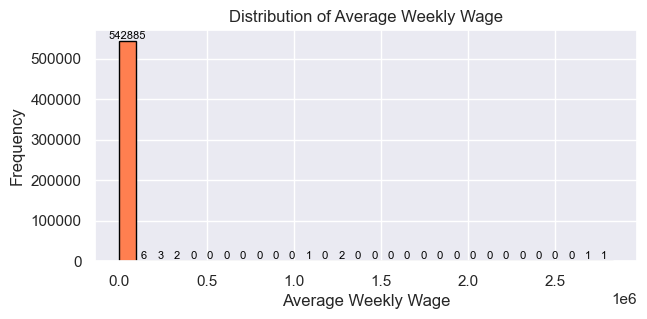

In [144]:
# Continuous Columns: Plotting Histogram with Count Labels Above the Bars
continuous_columns = ['Average Weekly Wage']

for column in continuous_columns:
    plt.figure(figsize=(7, 3))
    # Create histogram and store returned axes
    ax = df[column].plot(kind='hist', bins=30, color='coral', edgecolor='black')
    
    # Add count labels above each bar
    for patch in ax.patches:
        ax.annotate(f'{int(patch.get_height())}', 
                    (patch.get_x() + patch.get_width() / 2, patch.get_height()), 
                    ha='center', va='bottom', fontsize=8, color='black')

    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [145]:
df['Average Weekly Wage'].shape[0]

571445

In [146]:
df[df['Average Weekly Wage'] > 3000.00].shape[0]

5059

Since we have a lot of zeros, we will filtretthe plot.

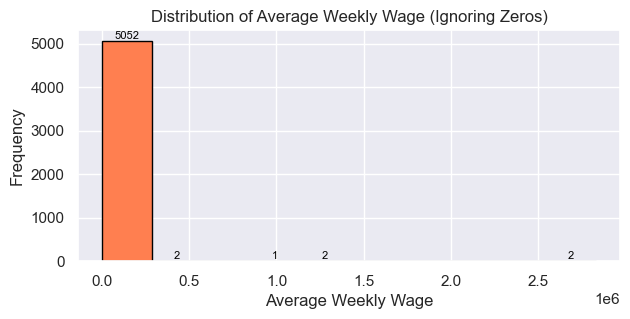

In [147]:
# Continuous Columns: Plotting Histogram with Count Labels Above the Bars, Ignoring Zeros
continuous_columns = ['Average Weekly Wage']

for column in continuous_columns:
    # Filter out rows with value equal to zero
    filtered_data = df[df[column] > 3000.00]

    plt.figure(figsize=(7, 3))
    # Create histogram with filtered data and store returned axes
    ax = filtered_data[column].plot(kind='hist', color='coral', edgecolor='black')
    
    # Add count labels above each bar
    for patch in ax.patches:
        if patch.get_height() > 0:  # Only add labels if count is greater than 0
            ax.annotate(f'{int(patch.get_height())}', 
                        (patch.get_x() + patch.get_width() / 2, patch.get_height()), 
                        ha='center', va='bottom', fontsize=8, color='black')

    plt.title(f'Distribution of {column} (Ignoring Zeros)')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

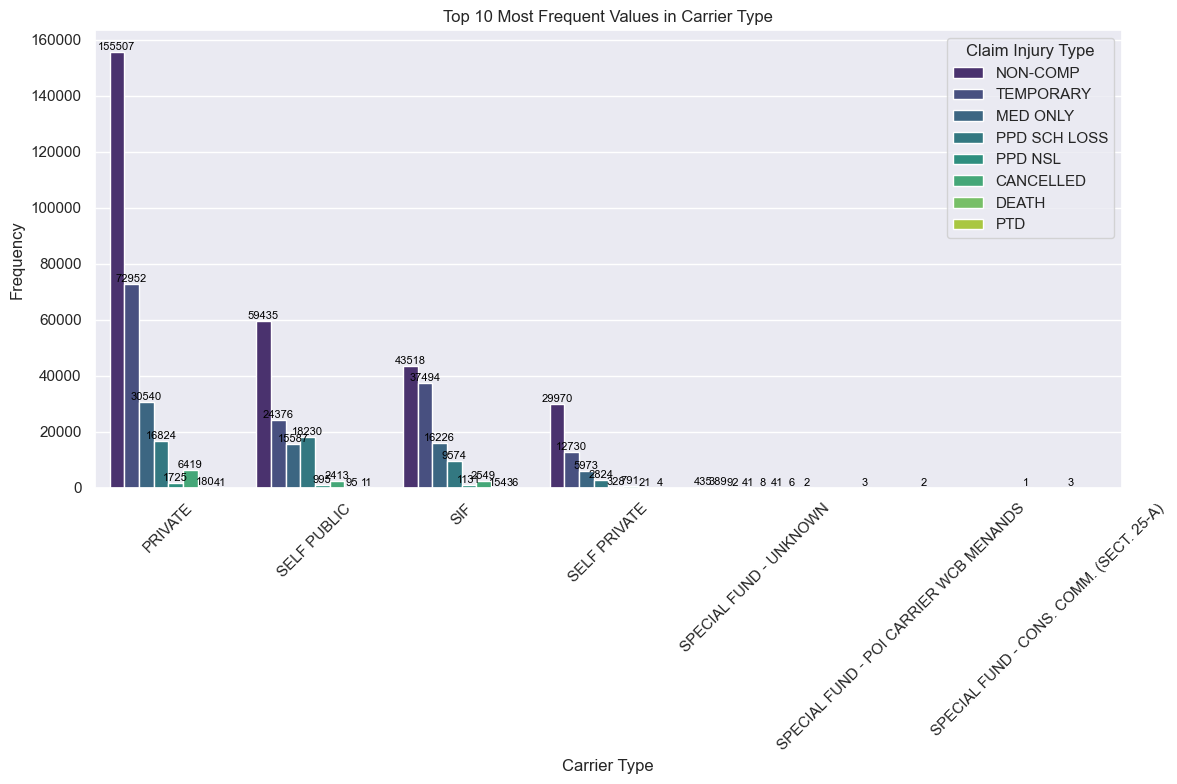

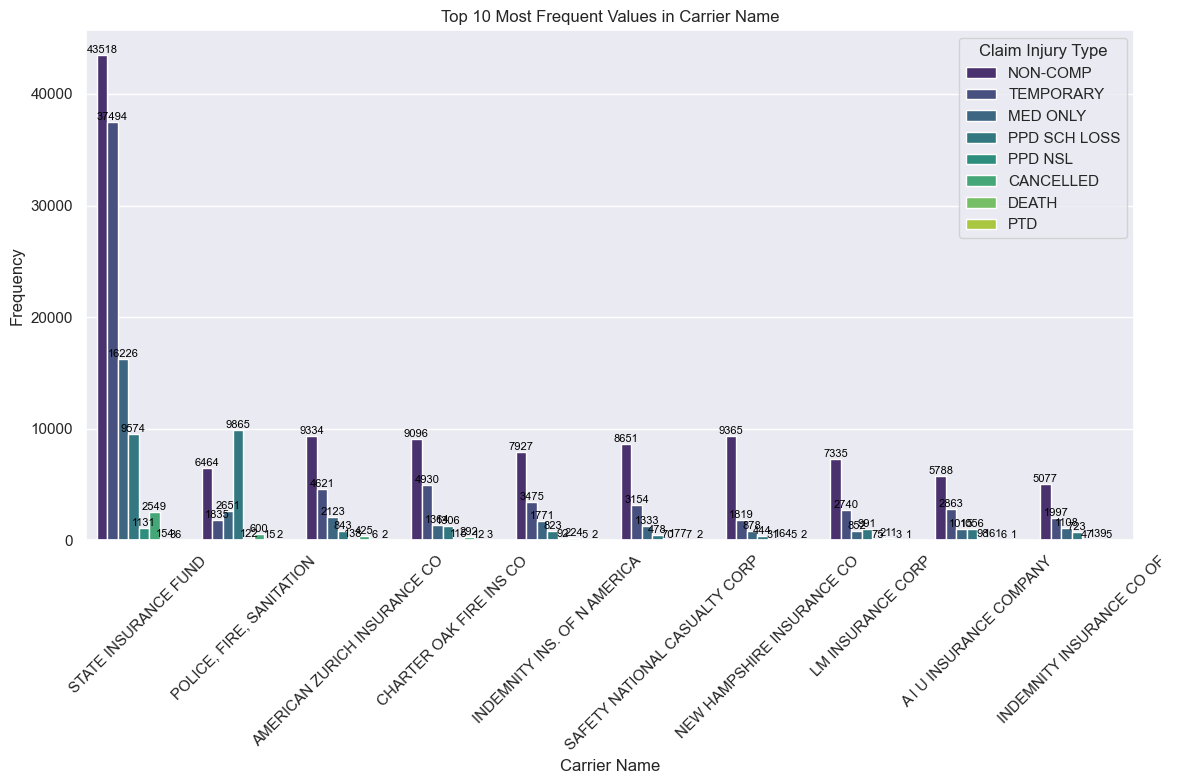

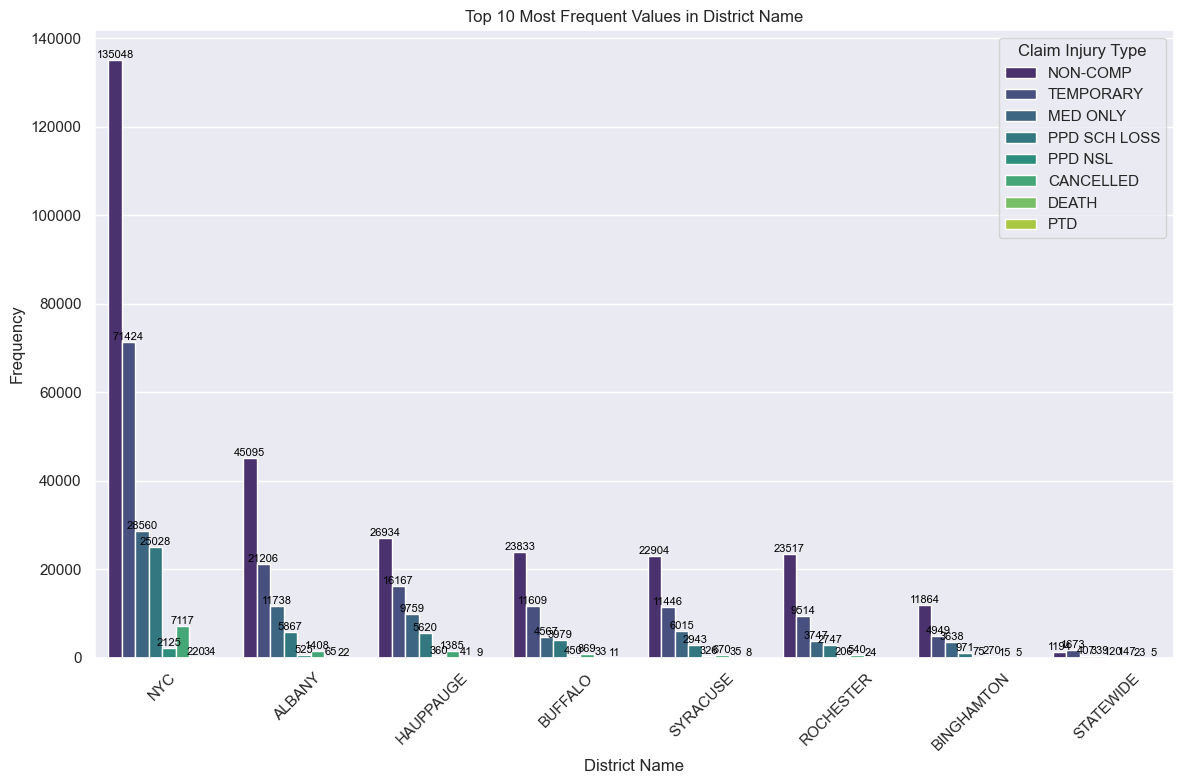

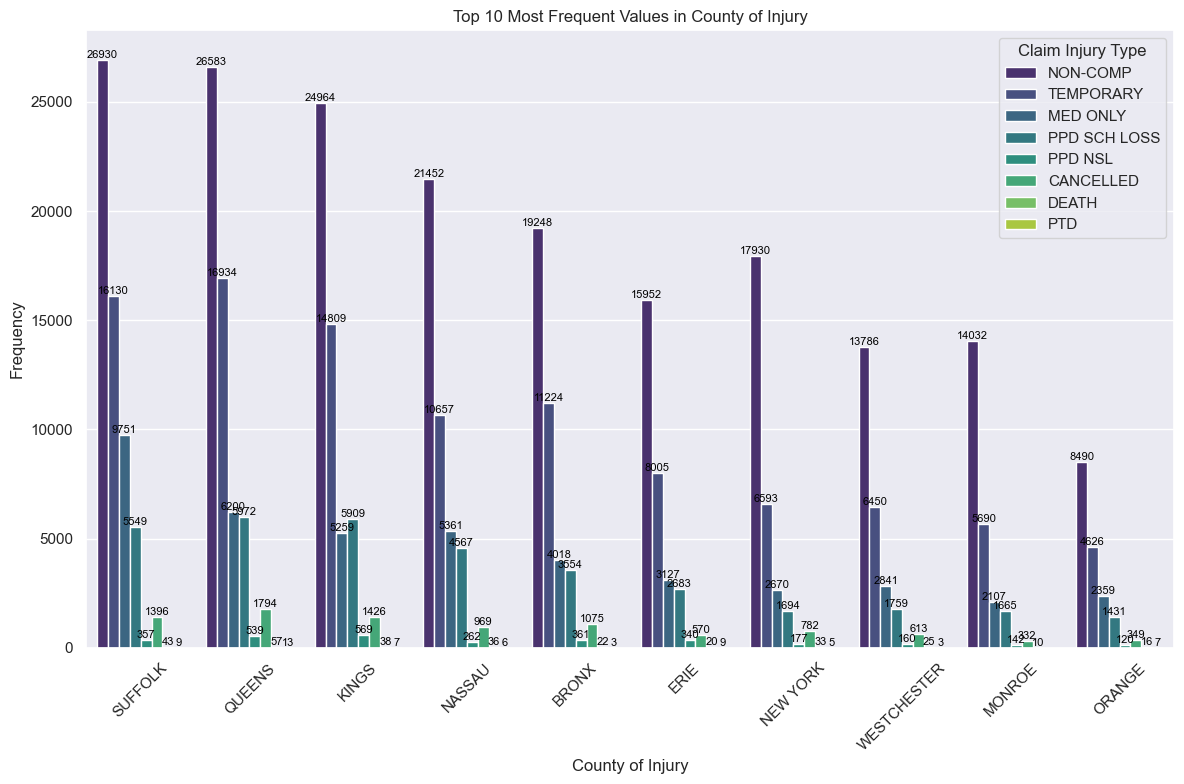

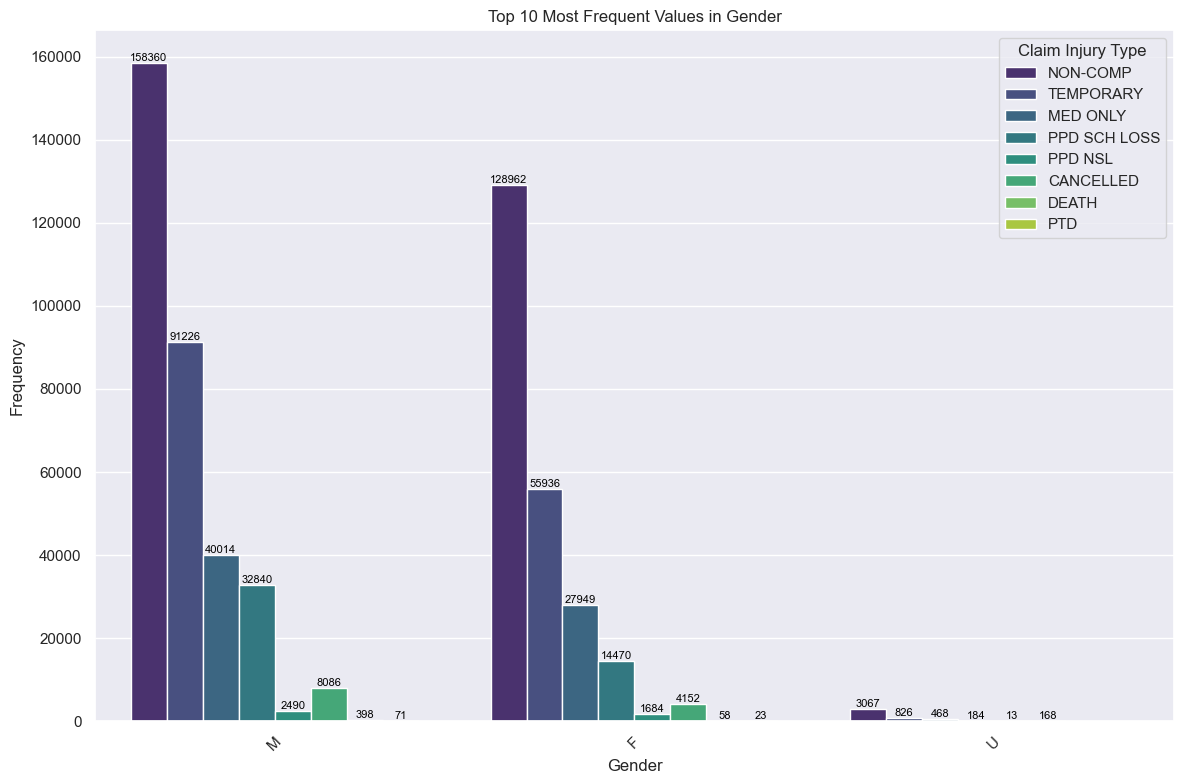

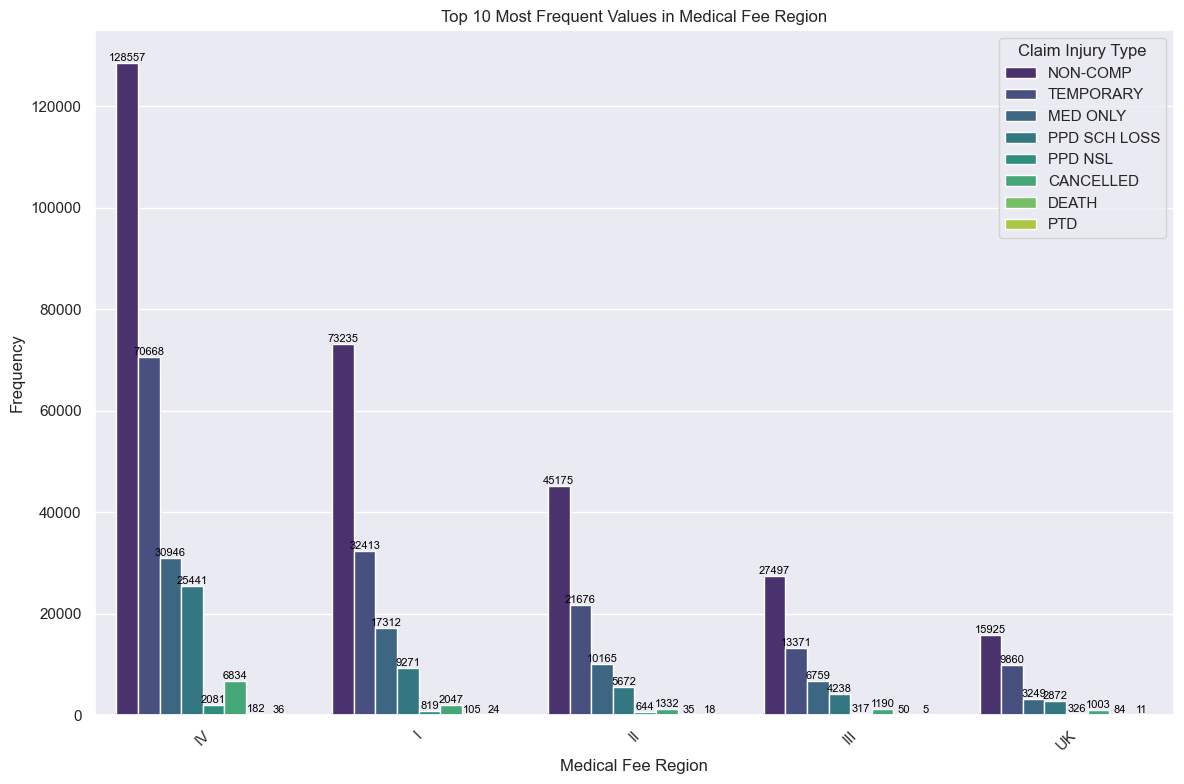

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns

# Categorical Columns: Plotting Frequency Distributions with Target as Hue
categorical_columns = ['Carrier Type', 'Carrier Name', 'District Name', 'County of Injury', 'Gender', 'Medical Fee Region']

# Loop through categorical columns and create separate figures
for column in categorical_columns:
    plt.figure(figsize=(12, 8))
    
    # Plot using seaborn to include hue (target column)
    ax = sns.countplot(data=df, x=column, hue='Claim Injury Type', palette='viridis', order=df[column].value_counts().iloc[:10].index)
    
    # Set title and labels
    plt.title(f'Top 10 Most Frequent Values in {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    
    # Add count labels above each bar
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=8, color='black')

    # Show the plot
    plt.tight_layout()
    plt.show()

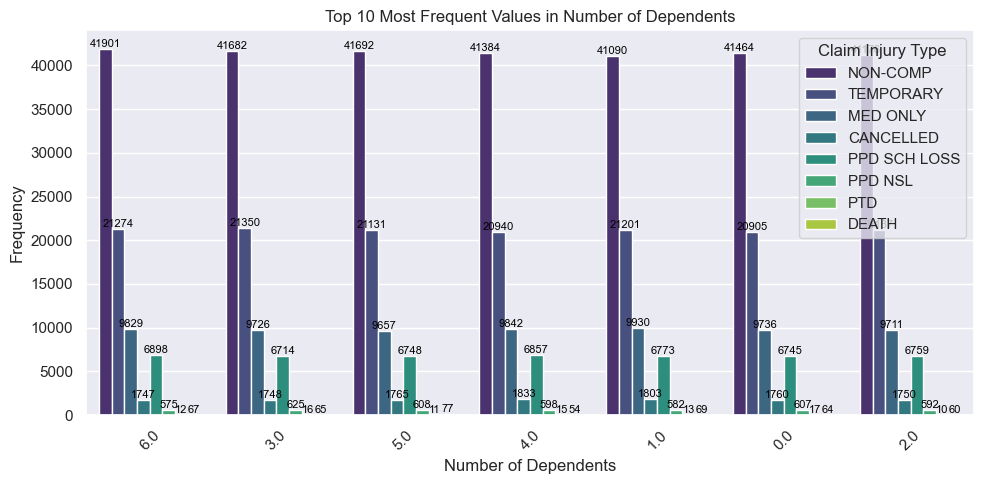

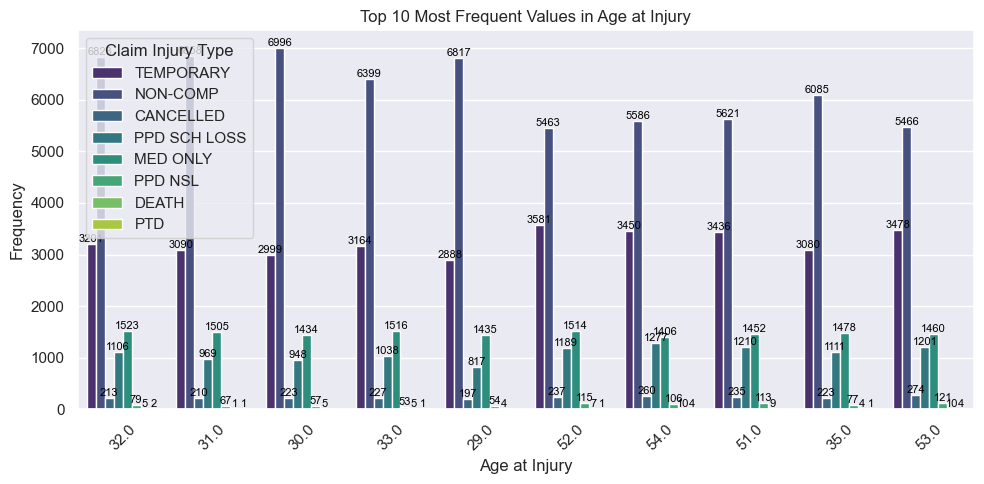

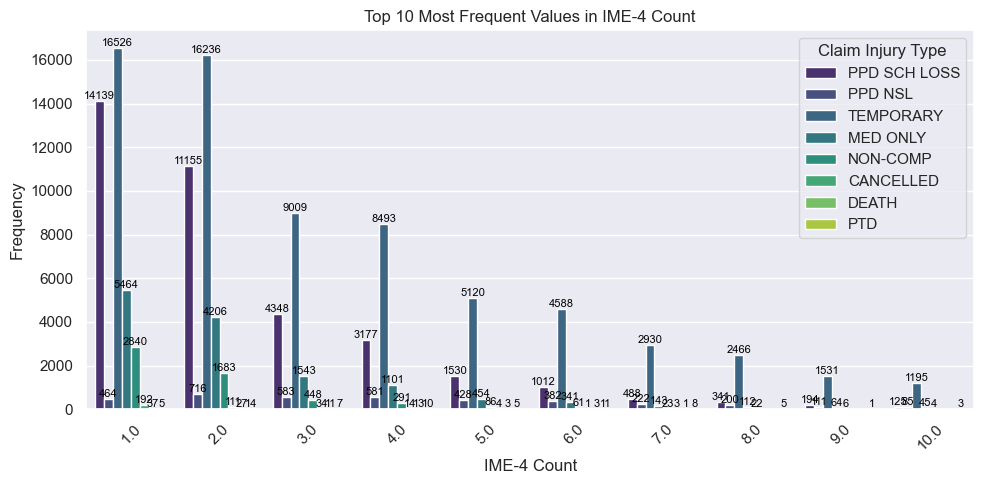

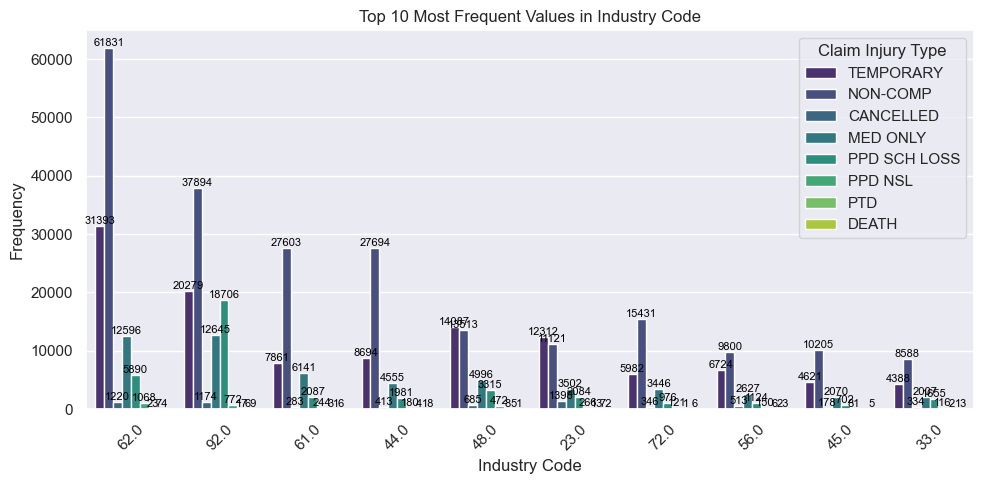

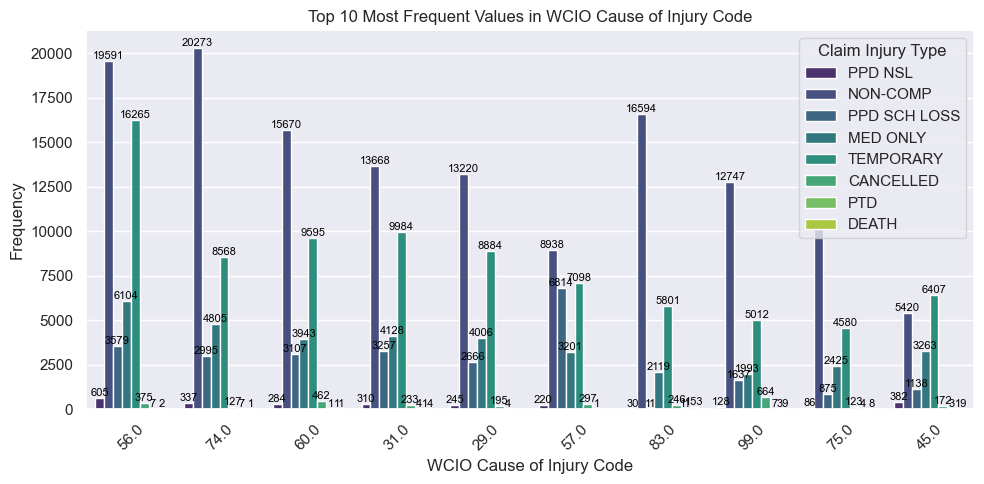

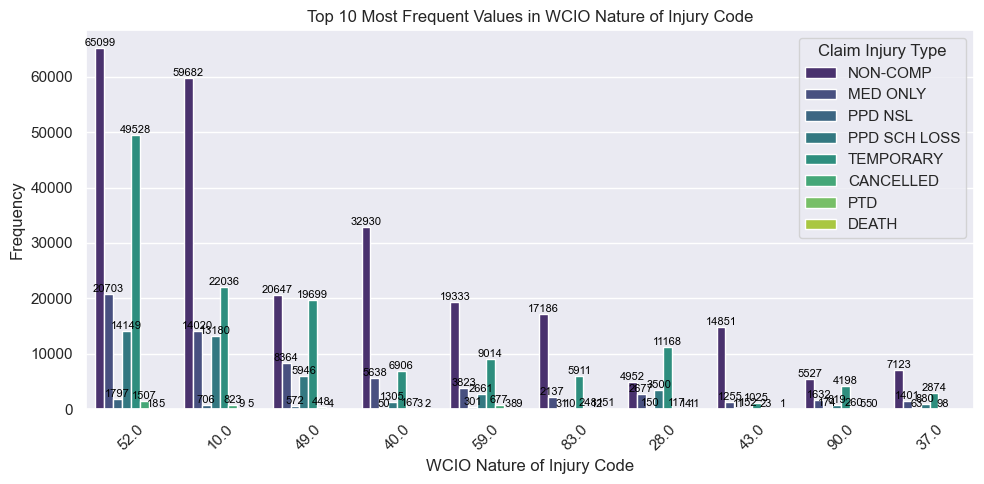

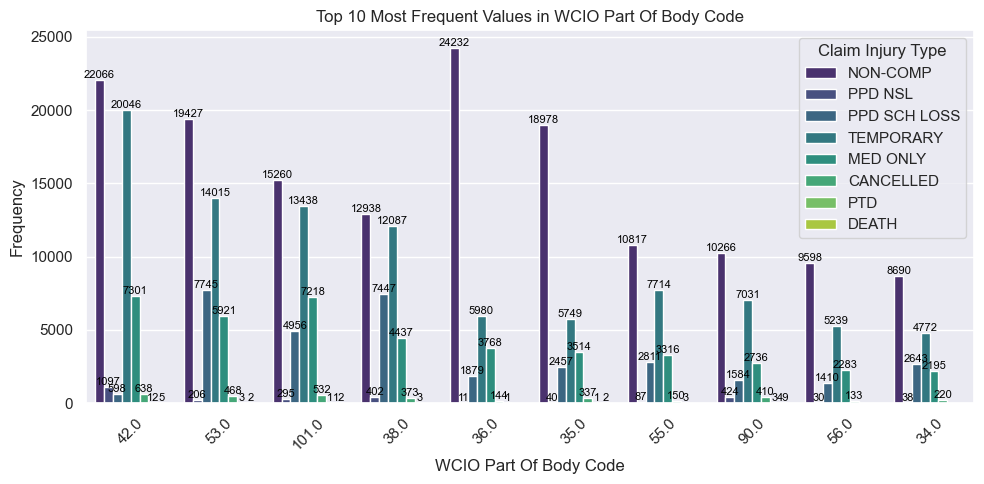

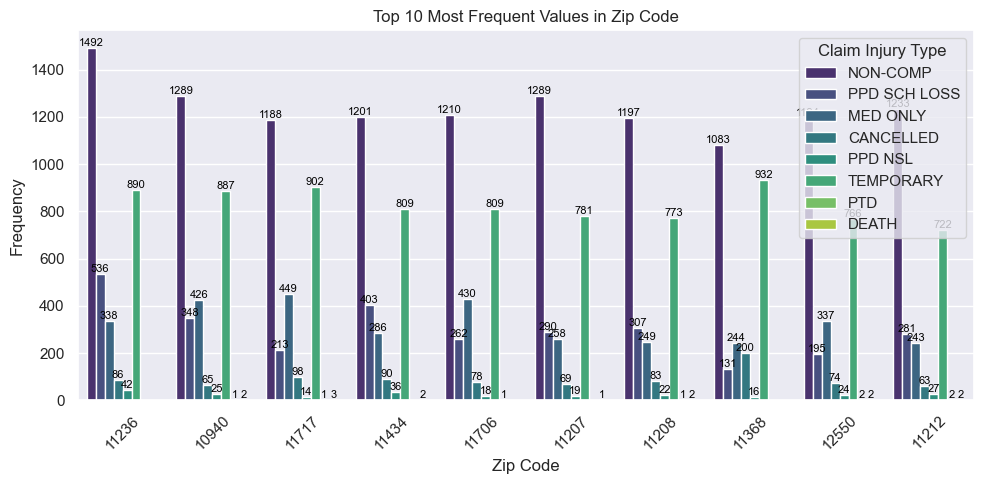

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns

# Discrete Columns: Plotting Top 15 Most Frequent Values with Target as Hue
discrete_columns = ['Number of Dependents', 'Age at Injury', 'IME-4 Count', 'Industry Code', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Zip Code']

# Loop through discrete columns and create separate figures
for column in discrete_columns:
    plt.figure(figsize=(10, 5))
    
    # Select the top 10 most frequent values for the current column
    top_10_values = df[column].value_counts().nlargest(10).index
    
    # Plot using seaborn to include hue (target column)
    ax = sns.countplot(data=df[df[column].isin(top_10_values)], x=column, hue='Claim Injury Type', palette='viridis', order=top_10_values)
    
    # Set title and labels
    plt.title(f'Top 10 Most Frequent Values in {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    
    # Add count labels above each bar
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=8, color='black')

    # Show the plot
    plt.tight_layout()
    plt.show()

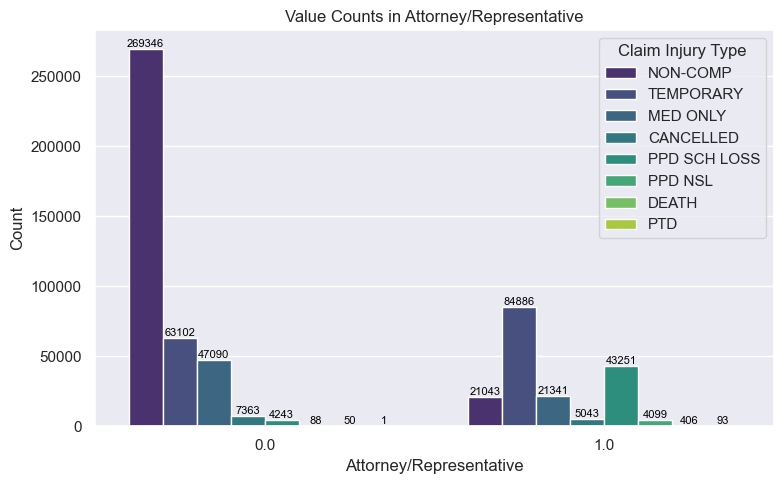

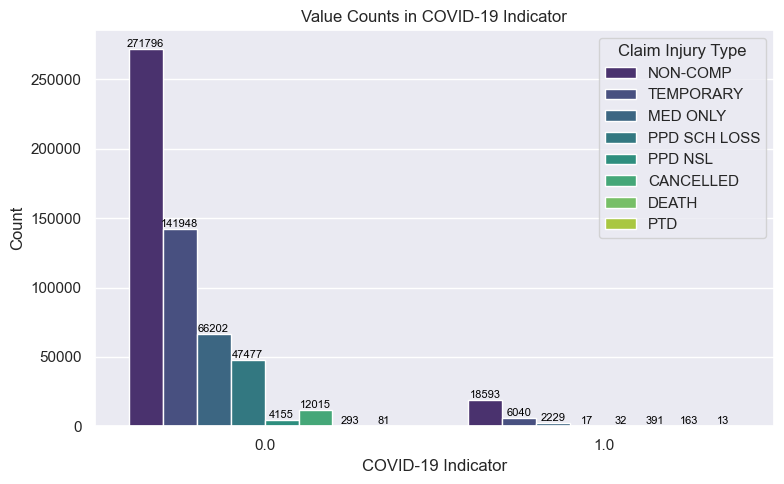

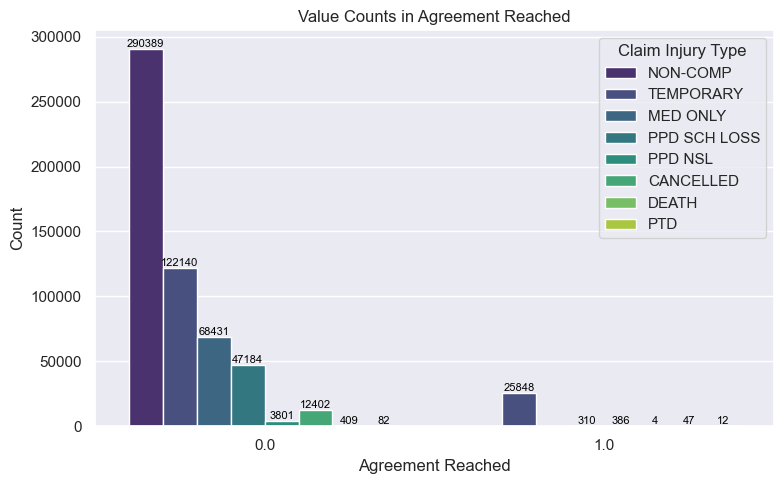

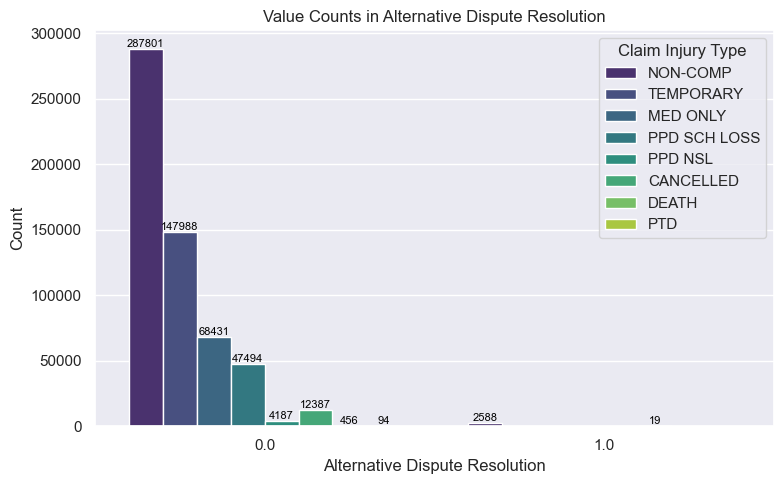

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns

# Binary Columns: Plotting Counts of Values with Target as Hue
binary_columns = ['Attorney/Representative', 'COVID-19 Indicator', 'Agreement Reached','Alternative Dispute Resolution']

# Loop through binary columns and create separate figures
for column in binary_columns:
    plt.figure(figsize=(8, 5))
    
    # Plot using seaborn to include hue (target column)
    ax = sns.countplot(data=df, x=column, hue='Claim Injury Type', palette='viridis')
    
    # Set title and labels
    plt.title(f'Value Counts in {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    
    # Add count labels above each bar
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=8, color='black')

    # Show the plot
    plt.tight_layout()
    plt.show()

# 4. Train Test Split <a class="anchor" id="chapter4"></a>

Splitting the dataset into training and test sets is a crucial step in building a machine learning model. In this project, we perform the train-test split after correcting inconsistencies but before data preprocessing, such as handling missing values, outlier treatment, and feature scaling. This sequence helps in maintaining the integrity of our data and ensures that the model is trained and evaluated fairly.

The train-test split is performed after fixing inconsistencies but before preprocessing to ensure that we do not inadvertently introduce information from the test set into the training set. This allows us to maintain the integrity of our model evaluation and helps ensure that the results obtained during model evaluation are unbiased and reflect the model’s performance on truly unseen data.


In [151]:
X= df.drop('Claim Injury Type',axis=1)
y= df['Claim Injury Type']

# Encode o target
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.3, 
                                                  random_state = 0, 
                                                  stratify = y, 
                                                  shuffle = True)

# 5. Preprocessing the Dataset ⚒️ <a class="anchor" id="chapter5"></a>
In this chapter we will perform the basic steps to get to know our dataset.

## 5.1. Missing Values <a class="anchor" id="section_5_1"></a>


We may also have missing values that are incorrectly set to zero. Therefore, we will use .eq(0) to identify if there are any columns with zeros that are not supposed to have them.

In [152]:
X_train.eq(0).sum()

Accident Date                          0
Age at Injury                          0
Alternative Dispute Resolution    398137
Assembly Date                          0
Attorney/Representative           273889
Average Weekly Wage               234118
Birth Year                             0
C-2 Date                               0
C-3 Date                               0
Carrier Name                           0
Carrier Type                           0
County of Injury                       0
COVID-19 Indicator                380881
District Name                          0
First Hearing Date                     0
Gender                                 0
IME-4 Count                            0
Industry Code                          0
Medical Fee Region                     0
WCIO Cause of Injury Code              0
WCIO Nature of Injury Code             0
WCIO Part Of Body Code                 0
Zip Code                               0
Agreement Reached                 381385
Number of Depend

In [153]:
# Set the threshold for zero values (e.g., more than 20% zeros)
threshold = 0.2

# Calculate the percentage of zeros for each column
zero_percentage = X_train.eq(0).mean()

# Filter columns that have more than the threshold of zero values
high_zero_columns = zero_percentage[zero_percentage > threshold]

# Display the columns with their zero percentage
print(high_zero_columns)

Alternative Dispute Resolution    0.995315
Attorney/Representative           0.684704
Average Weekly Wage               0.585279
COVID-19 Indicator                0.952176
Agreement Reached                 0.953436
dtype: float64


We found that only one column, Average Weekly Wage, contains an unexpectedly high number of zeros. Since this dataset is related to work insurance, every employee must have a weekly wage, meaning these zeros are likely incorrect and should be treated as missing values. Therefore, we will replace the zeros in the Average Weekly Wage column with NaN.

In [154]:
X_train['Average Weekly Wage'] = X_train['Average Weekly Wage'].replace(0, np.nan)

#Apply also to val
X_val['Average Weekly Wage'] = X_val['Average Weekly Wage'].replace(0, np.nan)

# Apply to the test set
df_test['Average Weekly Wage'] = df_test['Average Weekly Wage'].replace(0, np.nan)

Now that we have addressed the Average Weekly Wage feature by treating zeros as missing values, we will proceed to examine the dataset for any remaining NaN values.

In [155]:
X_train.isnull().sum()

Accident Date                       2572
Age at Injury                      39919
Alternative Dispute Resolution         0
Assembly Date                          0
Attorney/Representative                0
Average Weekly Wage               254052
Birth Year                         37693
C-2 Date                           10231
C-3 Date                          269875
Carrier Name                           0
Carrier Type                        1252
County of Injury                       0
COVID-19 Indicator                     0
District Name                          0
First Hearing Date                295683
Gender                                 0
IME-4 Count                       307925
Industry Code                       7005
Medical Fee Region                     0
WCIO Cause of Injury Code          10983
WCIO Nature of Injury Code         10998
WCIO Part Of Body Code             12010
Zip Code                           20262
Agreement Reached                      0
Number of Depend

In [156]:
# Set the threshold for missing values (e.g., more than 30% missing)
threshold = 0.2

# Calculate the percentage of missing values for each column
missing_percentage = X_train.isnull().mean()

# Filter columns that have more than the threshold of missing values
high_missing_columns = missing_percentage[missing_percentage > threshold]

# Display the columns with their missing percentage
print(high_missing_columns)

Average Weekly Wage    0.635113
C-3 Date               0.674669
First Hearing Date     0.739187
IME-4 Count            0.769791
dtype: float64


Based on the dataset description, the First Hearing Date feature contains missing values represented by NaN, but these values are meaningful, so we have decided not to remove this feature from the dataset. Since more than 70% of the entries are missing, we may consider creating a binary variable during feature engineering—e.g., 0 for NaN values and 1 otherwise.

Let's explore more about the rest of missing values.

> IME-4

In [157]:
X_train['IME-4 Count'].unique()

array([nan,  3.,  2.,  1., 10., 12.,  5.,  4.,  7.,  9.,  8.,  6., 11.,
       17., 19., 15., 13., 16., 18., 14., 28., 27., 26., 22., 21., 24.,
       25., 30., 20., 23., 36., 34., 31., 48., 39., 73., 29., 35., 33.,
       37., 32.])

As IME-4 represents the number of independent medical audicts examination we decided to convert nan to 0 meaning that there wasn't any.

In [158]:
X_train['IME-4 Count'].fillna(0, inplace=True)

#Apply to the val set
X_val['IME-4 Count'].fillna(0, inplace=True)

# Apply to the test set
df_test['IME-4 Count'].fillna(0, inplace=True)

X_train['IME-4 Count'].unique()

array([ 0.,  3.,  2.,  1., 10., 12.,  5.,  4.,  7.,  9.,  8.,  6., 11.,
       17., 19., 15., 13., 16., 18., 14., 28., 27., 26., 22., 21., 24.,
       25., 30., 20., 23., 36., 34., 31., 48., 39., 73., 29., 35., 33.,
       37., 32.])

> C-3 Date


We decided to drop C-3 Date based on the threshold that we pre defined meaning those features don't have enough predictive power based on the amount of missing information.


In [159]:
X_train = X_train.drop('C-3 Date', axis=1)

#Apply to the val set
X_val = X_val.drop('C-3 Date', axis=1)

# Apply to the test set
df_test = df_test.drop('C-3 Date', axis=1)

> Average Weekly Wage

For now, we will impute the missing values from Average Weekly Wage based on the Industry Code



In [160]:
# Calculate the mean of 'Average Weekly Wage' for each 'Industry Code' in the training dataset
industry_means_train = X_train.groupby('Industry Code')['Average Weekly Wage'].mean()

# Define a function to fill missing values based on 'Industry Code' using training means
def impute_average_weekly_wage(row):
    if pd.isnull(row['Average Weekly Wage']):
        return industry_means_train.get(row['Industry Code'], row['Average Weekly Wage'])
    return row['Average Weekly Wage']

# Apply the function to fill missing values in 'Average Weekly Wage' for X_train, X_val, and X_test
X_train['Average Weekly Wage'] = X_train.apply(impute_average_weekly_wage, axis=1)
X_val['Average Weekly Wage'] = X_val.apply(impute_average_weekly_wage, axis=1)
df_test['Average Weekly Wage'] = df_test.apply(impute_average_weekly_wage, axis=1)

> Zip Code


Imputing the Zip Code based on Country of Injury and District Name



In [161]:
# Calculate the mode of 'Zip Code' for each ('County of Injury', 'District Name') pair in the training dataset
zip_code_mode_train = X_train.groupby(['County of Injury', 'District Name'])['Zip Code'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)

# Define a function to impute 'Zip Code' based on 'County of Injury' and 'District Name' using training mode
def impute_zip_code(row):
    if pd.isna(row['Zip Code']):
        # Get the mode of the zip code for the given county and district from training set
        return zip_code_mode_train.get((row['County of Injury'], row['District Name']), row['Zip Code'])
    return row['Zip Code']

# Apply the imputation function to 'Zip Code' for X_train, X_val, and X_test
X_train['Zip Code'] = X_train.apply(impute_zip_code, axis=1)
X_val['Zip Code'] = X_val.apply(impute_zip_code, axis=1)
df_test['Zip Code'] = df_test.apply(impute_zip_code, axis=1)

> Industry Code

Imputing the Industry Code based on carrier name and carrier type

In [162]:
# Calculate the mode of 'Industry Code' for each ('Carrier Name', 'Carrier Type') pair in the training dataset
industry_code_mode_train = X_train.groupby(['Carrier Name', 'Carrier Type'])['Industry Code'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)

# Define a function to impute 'Industry Code' based on 'Carrier Name' and 'Carrier Type' using training mode
def impute_industry_code(row):
    if pd.isna(row['Industry Code']):
        # Get the mode of the industry code for the given carrier name and carrier type from training set
        return industry_code_mode_train.get((row['Carrier Name'], row['Carrier Type']), row['Industry Code'])
    return row['Industry Code']

# Apply the imputation function to 'Industry Code' for X_train, X_val, and df_test
X_train['Industry Code'] = X_train.apply(impute_industry_code, axis=1)
X_val['Industry Code'] = X_val.apply(impute_industry_code, axis=1)
df_test['Industry Code'] = df_test.apply(impute_industry_code, axis=1)

> Assembly Date

Imputing the Industry Code based on carrier name and carrier type

In [163]:
# Ensure 'Assembly Date' is in datetime format for all datasets
X_train['Assembly Date'] = pd.to_datetime(X_train['Assembly Date'], errors='coerce')
X_val['Assembly Date'] = pd.to_datetime(X_val['Assembly Date'], errors='coerce')
df_test['Assembly Date'] = pd.to_datetime(df_test['Assembly Date'], errors='coerce')

# Define a function to impute 'Birth Year' based on 'Assembly Date' and 'Age at Injury'
def impute_birth_year(row):
    if pd.isna(row['Birth Year']):
        if pd.notna(row['Assembly Date']) and pd.notna(row['Age at Injury']):
            # Calculate birth year by subtracting age at injury from assembly year
            assembly_year = row['Assembly Date'].year
            return float(assembly_year - row['Age at Injury'])
    return row['Birth Year']

# Apply the imputation function to 'Birth Year' for X_train, X_val, and df_test
X_train['Birth Year'] = X_train.apply(impute_birth_year, axis=1)
X_val['Birth Year'] = X_val.apply(impute_birth_year, axis=1)
df_test['Birth Year'] = df_test.apply(impute_birth_year, axis=1)

> Age at Injury

In [164]:
# Calculate 'Age at Injury' for X_train, X_val, and df_test based on 'Accident Year' and 'Birth Year'
X_train['Age at Injury'] = X_train['Accident Year'] - X_train['Birth Year']
X_val['Age at Injury'] = X_val['Accident Year'] - X_val['Birth Year']
df_test['Age at Injury'] = df_test['Accident Year'] - df_test['Birth Year']


'Age at Injury' captures the relevant information, then it makes sense to drop 'Birth Year' to avoid redundancy and potential multicollinearity.

In [165]:
# Drop 'Birth Year' from X_train, X_val, and df_test
X_train = X_train.drop(columns=['Birth Year'])
X_val = X_val.drop(columns=['Birth Year'])
df_test = df_test.drop(columns=['Birth Year'])

In [166]:
missing_percentage = X_train.isnull().mean() * 100
missing_percentage

Accident Date                      0.642982
Age at Injury                      9.979476
Alternative Dispute Resolution     0.000000
Assembly Date                      0.000000
Attorney/Representative            0.000000
Average Weekly Wage                1.707953
C-2 Date                           2.557680
Carrier Name                       0.000000
Carrier Type                       0.312991
County of Injury                   0.000000
COVID-19 Indicator                 0.000000
District Name                      0.000000
First Hearing Date                73.918717
Gender                             0.000000
IME-4 Count                        0.000000
Industry Code                      0.208244
Medical Fee Region                 0.000000
WCIO Cause of Injury Code          2.745674
WCIO Nature of Injury Code         2.749424
WCIO Part Of Body Code             3.002417
Zip Code                           0.001250
Agreement Reached                  0.000000
Number of Dependents            

Let's check how many more missing values in percentage do we have

In [167]:
# Identify rows with missing values, excluding 'First Hearing Date'
missing_values = X_train[X_train.columns.difference(['First Hearing Date'])].isna().any(axis=1)

# Calculate the percentage of rows that have missing values (excluding 'First Hearing Date')
percentage_missing = (missing_values.sum() / len(X_train)) * 100

# Print the percentage of rows with missing values
print(f"Percentage of rows with missing values (excluding 'First Hearing Date'): {percentage_missing:.2f}%")


Percentage of rows with missing values (excluding 'First Hearing Date'): 12.49%


Let's check also if we exclude the Age at Injury.

In [168]:
# Identify rows with missing values, excluding 'First Hearing Date'
missing_values = X_train[X_train.columns.difference(['First Hearing Date','Age at Injury'])].isna().any(axis=1)

# Calculate the percentage of rows that have missing values (excluding 'First Hearing Date')
percentage_missing = (missing_values.sum() / len(X_train)) * 100

# Print the percentage of rows with missing values
print(f"Percentage of rows with missing values (excluding 'First Hearing Date'): {percentage_missing:.2f}%")


Percentage of rows with missing values (excluding 'First Hearing Date'): 3.72%


## we can consider this: We decrease a lot the percentage of rows with missing values, so, for this motive we will delete the variable Age at Injury.

In [169]:
# #Drop Age at Injury from the train, val and test set
# X_train = X_train.drop(columns=['Age at Injury'])
# X_val = X_val.drop(columns=['Age at Injury'])
# df_test = df_test.drop(columns=['Age at Injury'])

In [170]:
# Identify rows with missing values, excluding 'First Hearing Date'
missing_values = X_train[X_train.columns.difference(['First Hearing Date'])].isna().any(axis=1)

# Calculate the percentage of rows that have missing values (excluding 'First Hearing Date')
percentage_missing = (missing_values.sum() / len(X_train)) * 100

# Print the percentage of rows with missing values
print(f"Percentage of rows with missing values (excluding 'First Hearing Date'): {percentage_missing:.2f}%")

Percentage of rows with missing values (excluding 'First Hearing Date'): 12.49%


Since only 3.72% of the values are missing, we decided to use KNNImputer to fill in these missing values. It’s important to note that we are not including 'First Hearing Date' in this imputation, as missing values in this column have a specific meaning. We plan to create a new feature based on the presence or absence of 'First Hearing Date' as part of the feature engineering process, after which the original column will be dropped.

In [171]:
# Create copies of the datasets to avoid modifying the original
X_train_copy = X_train.copy()
X_val_copy = X_val.copy()
df_test_copy = df_test.copy()

# Drop the column 'Agreement Reached' if it's not in the test set
columns_to_drop = ['Agreement Reached']
X_train_copy.drop(columns=columns_to_drop, errors='ignore', inplace=True)
X_val_copy.drop(columns=columns_to_drop, errors='ignore', inplace=True)

# Columns to be imputed using mode, excluding 'First Hearing Date'
columns_to_impute = X_train_copy.columns.difference(['First Hearing Date'])

# Mode imputation for each column (using mode of X_train)
for col in columns_to_impute:
    if col in X_train_copy.columns:  # Ensure the column exists in X_train_copy
        mode_value = X_train_copy[col].mode()[0]  # Calculate mode from the training set
        
        # Apply mode imputation to X_train, X_val, and df_test
        X_train_copy[col].fillna(mode_value, inplace=True)
        X_val_copy[col].fillna(mode_value, inplace=True)
        if col in df_test_copy.columns:  # Ensure the column exists in df_test_copy
            df_test_copy[col].fillna(mode_value, inplace=True)

# Final dataframes after mode imputation
X_train_processed = X_train_copy
X_val_processed = X_val_copy
df_test_processed = df_test_copy

# Print confirmation
print("Missing values imputed using mode, excluding 'First Hearing Date'. Columns were aligned across datasets.")


Missing values imputed using mode, excluding 'First Hearing Date'. Columns were aligned across datasets.


In [172]:
X_train_processed.isnull().mean() * 100

Accident Date                      0.000000
Age at Injury                      0.000000
Alternative Dispute Resolution     0.000000
Assembly Date                      0.000000
Attorney/Representative            0.000000
Average Weekly Wage                0.000000
C-2 Date                           0.000000
Carrier Name                       0.000000
Carrier Type                       0.000000
County of Injury                   0.000000
COVID-19 Indicator                 0.000000
District Name                      0.000000
First Hearing Date                73.918717
Gender                             0.000000
IME-4 Count                        0.000000
Industry Code                      0.000000
Medical Fee Region                 0.000000
WCIO Cause of Injury Code          0.000000
WCIO Nature of Injury Code         0.000000
WCIO Part Of Body Code             0.000000
Zip Code                           0.000000
Number of Dependents               0.000000
Accident Year                   

In [173]:
X_val_processed.isnull().mean() * 100

Accident Date                      0.000000
Age at Injury                      0.000000
Alternative Dispute Resolution     0.000000
Assembly Date                      0.000000
Attorney/Representative            0.000000
Average Weekly Wage                0.000000
C-2 Date                           0.000000
Carrier Name                       0.000000
Carrier Type                       0.000000
County of Injury                   0.000000
COVID-19 Indicator                 0.000000
District Name                      0.000000
First Hearing Date                73.795163
Gender                             0.000000
IME-4 Count                        0.000000
Industry Code                      0.000000
Medical Fee Region                 0.000000
WCIO Cause of Injury Code          0.000000
WCIO Nature of Injury Code         0.000000
WCIO Part Of Body Code             0.000000
Zip Code                           0.000000
Number of Dependents               0.000000
Accident Year                   

In [174]:
df_test_processed.isnull().mean() * 100

Accident Date                      0.000000
Age at Injury                      0.000000
Alternative Dispute Resolution     0.000000
Assembly Date                      0.000000
Attorney/Representative            0.000000
Average Weekly Wage                0.000000
C-2 Date                           0.000000
Carrier Name                       0.000000
Carrier Type                       0.000000
County of Injury                   0.000000
COVID-19 Indicator                 0.000000
District Name                      0.000000
First Hearing Date                88.909566
Gender                             0.000000
IME-4 Count                        0.000000
Industry Code                      0.000000
Medical Fee Region                 0.000000
WCIO Cause of Injury Code          0.000000
WCIO Nature of Injury Code         0.000000
WCIO Part Of Body Code             0.000000
Zip Code                           0.000000
Number of Dependents               0.000000
Accident Year                   

## 5.2. Outliers <a class="anchor" id="section_5_2"></a>


Honestly idk how to do this part, the box plot only makes sense for the Avg Weekly age, because the rest is discrete.

In [175]:
# # Define metric and non-metric features
# metric_features = df_cleaned.select_dtypes(include=['number']).columns.tolist()
# non_metric_features = df_cleaned.select_dtypes(exclude=['number']).columns.tolist()

# # Output the results
# print(f"Non-metric features: {non_metric_features}")
# print(f"Metric features: {metric_features}")

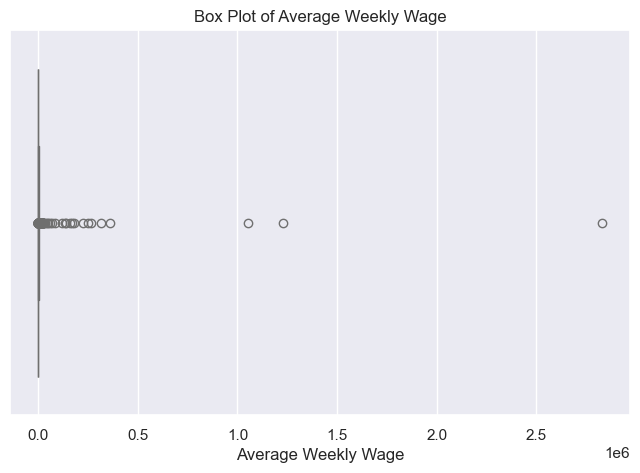

In [176]:
# Plotting Box Plots for Continuous Columns
for column in continuous_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=X_train_processed, x=column, color='skyblue')
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.show()

In [177]:
discrete_columns

['Number of Dependents',
 'Age at Injury',
 'IME-4 Count',
 'Industry Code',
 'WCIO Cause of Injury Code',
 'WCIO Nature of Injury Code',
 'WCIO Part Of Body Code',
 'Zip Code']

In [178]:
discrete_columns= ['Number of Dependents',
 'IME-4 Count',
 'Industry Code',
 'WCIO Cause of Injury Code',
 'WCIO Nature of Injury Code',
 'WCIO Part Of Body Code']

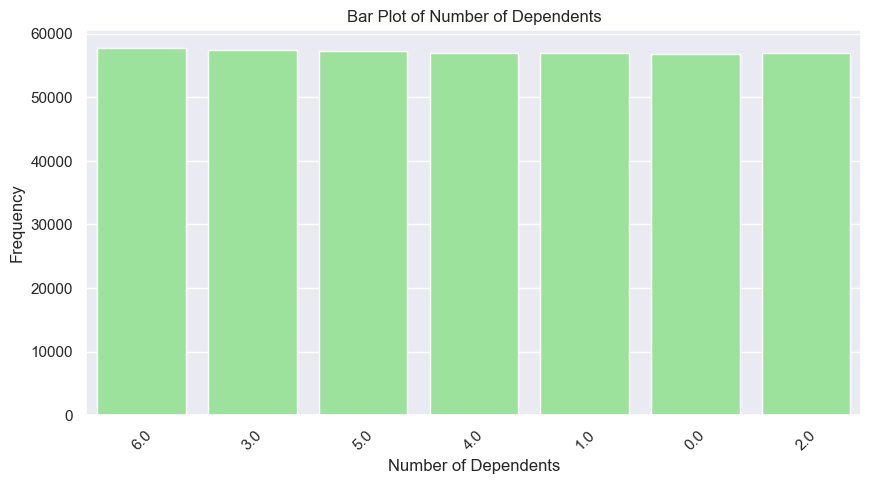

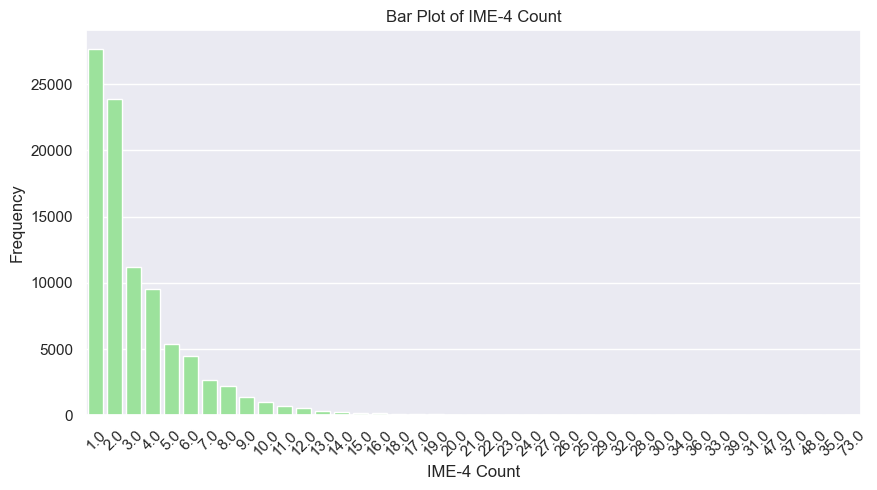

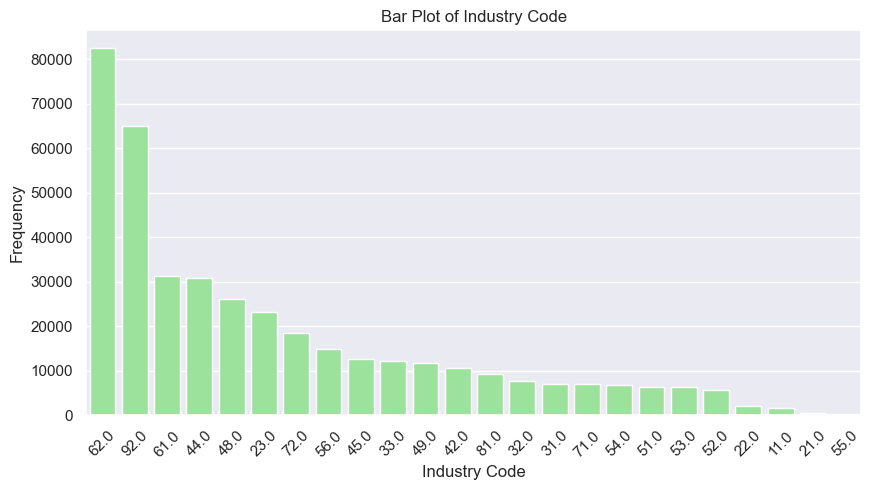

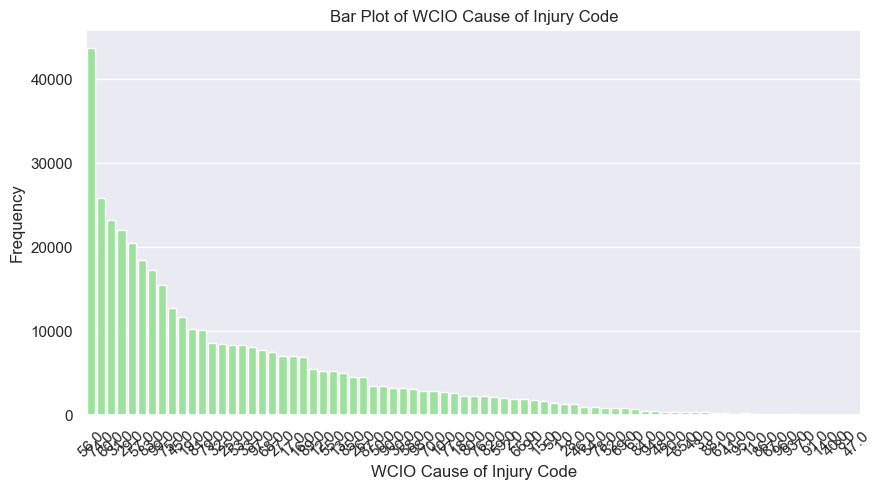

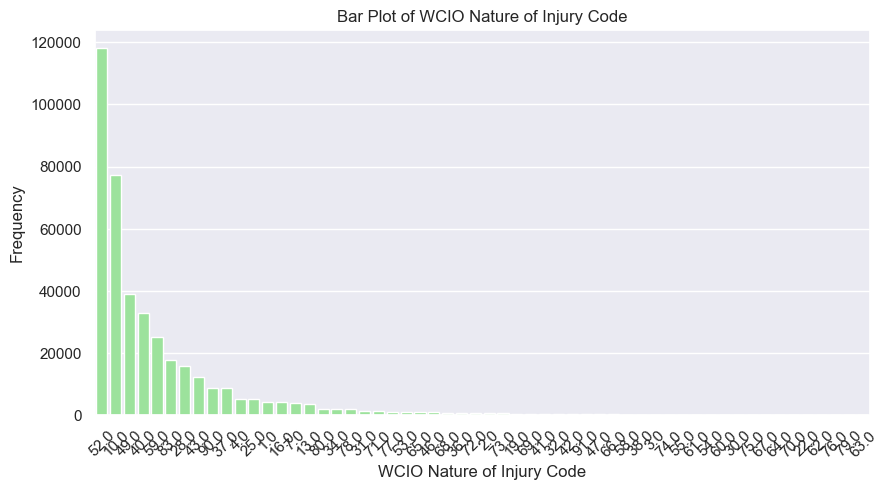

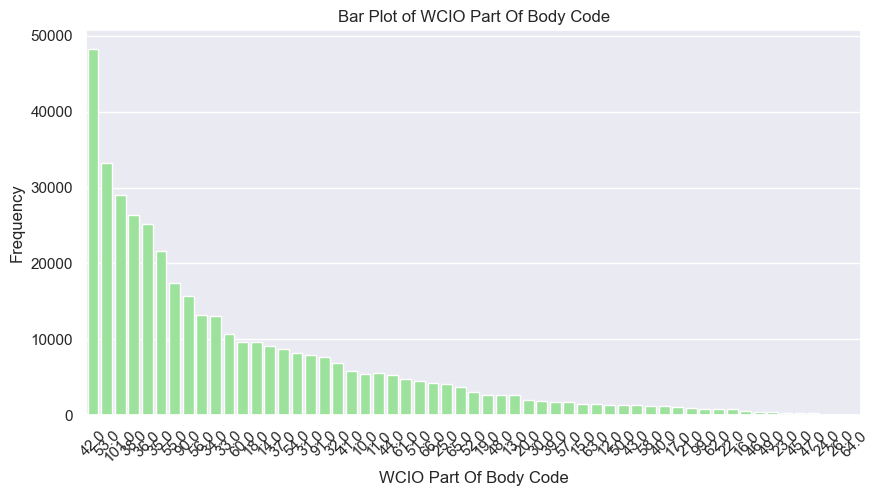

In [179]:
# Plotting Bar Plots for Discrete Columns
for column in discrete_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=X_train_processed, x=column, color='lightgreen', order=df[column].value_counts().index)
    plt.title(f'Bar Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

Also here we can really calculate the interquantile range and blablabla and explore more the outliers
Do we have outliers? the only one i can see is the Avg Weekly age.But we have so many problems with these column ahahah, maybe we can create some feature with the range of avg weekly age, for example, categories:
- low income
- avg
- high income.

In [180]:
# FUNÇÃO DOS OUTLIERS (isto em princípio é util mas depois vemos isto)

def detect_outliers(df):
    outliers_indices = set()
    for column in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outlier_data = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

        outliers_indices.update(outlier_data.index)

        # Print the number of outliers
        print(f'Column: {column} - Number of Outliers: {len(outlier_data)}')
        print(f'Column: {column} - % of Outliers: {len(outlier_data) / len(df) * 100}% \n') 

    return outliers_indices       

In [181]:
iqr = detect_outliers(X_train_processed)
iqr

Column: Age at Injury - Number of Outliers: 0
Column: Age at Injury - % of Outliers: 0.0% 

Column: Alternative Dispute Resolution - Number of Outliers: 1874
Column: Alternative Dispute Resolution - % of Outliers: 0.4684871166042934% 

Column: Attorney/Representative - Number of Outliers: 0
Column: Attorney/Representative - % of Outliers: 0.0% 

Column: Average Weekly Wage - Number of Outliers: 14869
Column: Average Weekly Wage - % of Outliers: 3.717147778436093% 

Column: COVID-19 Indicator - Number of Outliers: 19130
Column: COVID-19 Indicator - % of Outliers: 4.782368484866666% 

Column: IME-4 Count - Number of Outliers: 92086
Column: IME-4 Count - % of Outliers: 23.02086692615953% 

Column: Industry Code - Number of Outliers: 66626
Column: Industry Code - % of Outliers: 16.65604195884613% 

Column: WCIO Cause of Injury Code - Number of Outliers: 0
Column: WCIO Cause of Injury Code - % of Outliers: 0.0% 

Column: WCIO Nature of Injury Code - Number of Outliers: 0
Column: WCIO Nature

{5767173,
 5767175,
 5767179,
 5767185,
 5767186,
 5767194,
 5767203,
 5767205,
 5767207,
 5767208,
 5767211,
 5767213,
 5767215,
 5767219,
 5767227,
 5767228,
 5767235,
 5767237,
 5767238,
 5767246,
 5767249,
 5767252,
 5767258,
 5767259,
 5767263,
 5767264,
 5767267,
 5767268,
 5767269,
 5767270,
 5767275,
 5767278,
 5767279,
 5767281,
 5767285,
 5767291,
 5767295,
 5767298,
 5767310,
 5767313,
 5767316,
 5767318,
 5767319,
 5767322,
 5767327,
 5767331,
 5767338,
 5767342,
 5767347,
 5767349,
 5767353,
 5767354,
 5767359,
 5767362,
 5767363,
 5767364,
 5767371,
 5767373,
 5767377,
 5767379,
 5767380,
 5767383,
 5767390,
 5767391,
 5767395,
 5767413,
 5767414,
 5767415,
 5767418,
 5767419,
 5767425,
 5767426,
 5767435,
 5767445,
 5767448,
 5767454,
 5767459,
 5767463,
 5767465,
 5767466,
 5767469,
 5767472,
 5767477,
 5767481,
 5767492,
 5767499,
 5767506,
 5767509,
 5767517,
 5767524,
 5767526,
 5767528,
 5767536,
 5767545,
 5767548,
 5767554,
 5767559,
 5767562,
 5767565,
 5767567,


## 5.3. Categorical Features <a class="anchor" id="section_5_3"></a>
What should we do? encoding?

this prob makes more sense after the feature enginerring because we can create some features bases on these one

In [182]:
features_categorical = [
    'Alternative Dispute Resolution',
    'Attorney/Representative',
    'COVID-19 Indicator',
    'County of Injury',
    'Carrier Type',
    'District Name',
    'Gender',
    'Industry Code Description',
    'Medical Fee Region'
]

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [183]:
features_categorical

['Alternative Dispute Resolution',
 'Attorney/Representative',
 'COVID-19 Indicator',
 'County of Injury',
 'Carrier Type',
 'District Name',
 'Gender',
 'Industry Code Description',
 'Medical Fee Region']

In [184]:
features_categorical= ['Alternative Dispute Resolution',
 'Attorney/Representative',
 'COVID-19 Indicator',
 'County of Injury',
 'Carrier Type',
 'District Name',
 'Gender',
 'Medical Fee Region']

Alternative Dispute Resolution
float64


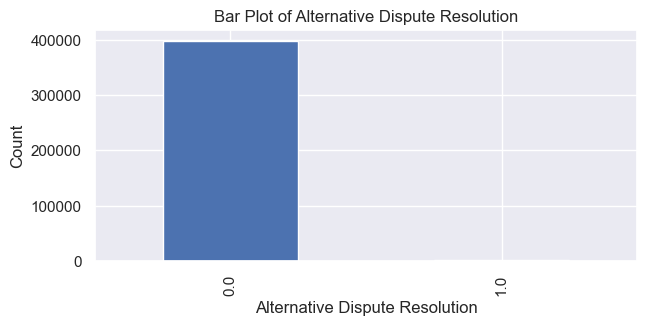

Attorney/Representative
float64


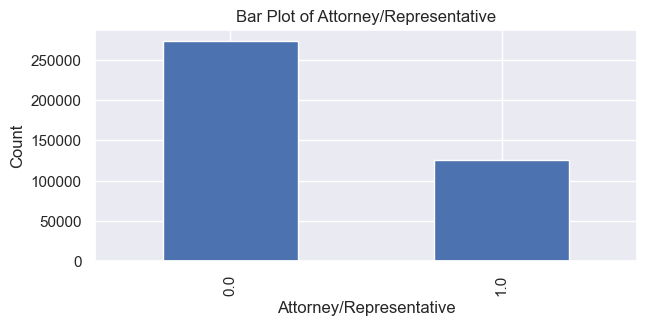

COVID-19 Indicator
float64


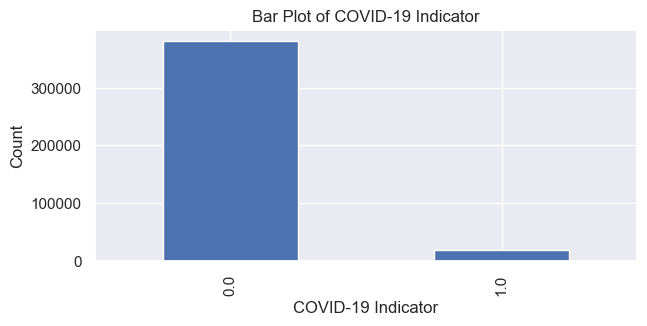

County of Injury
object


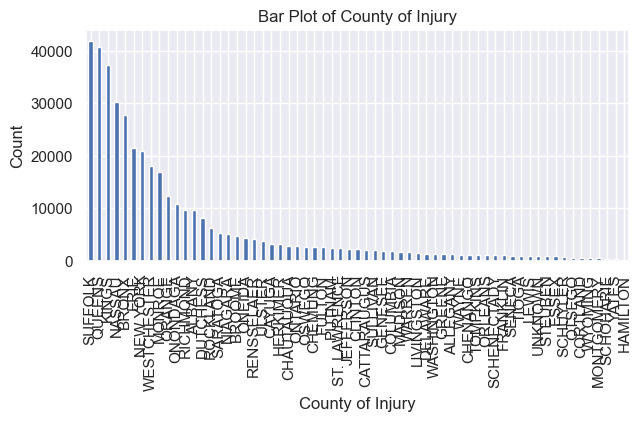

Carrier Type
object


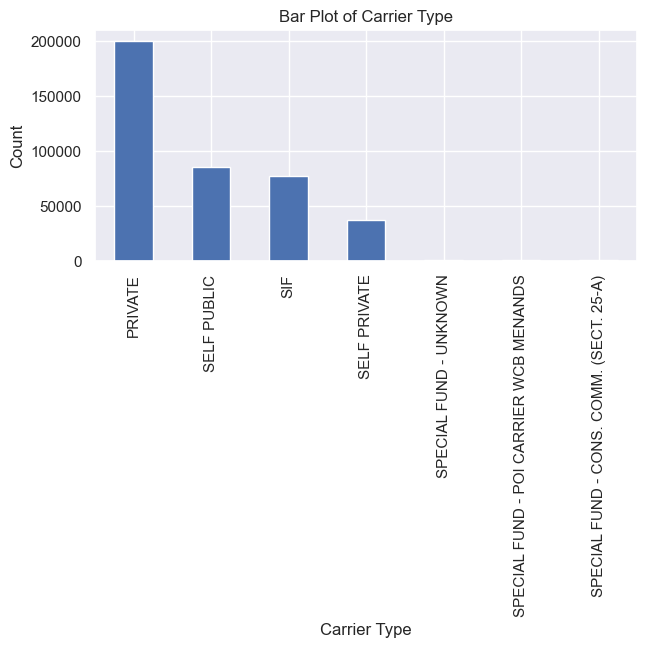

District Name
object


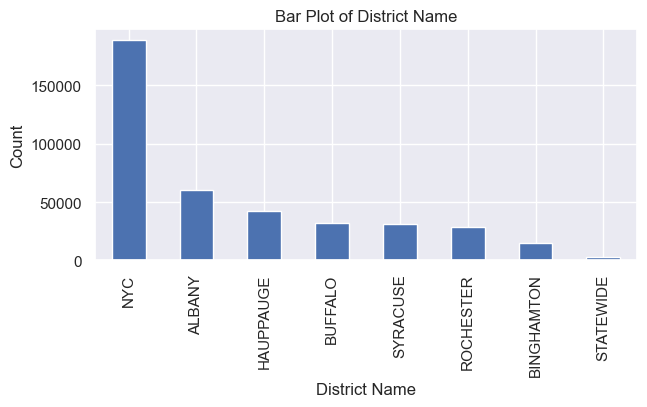

Gender
object


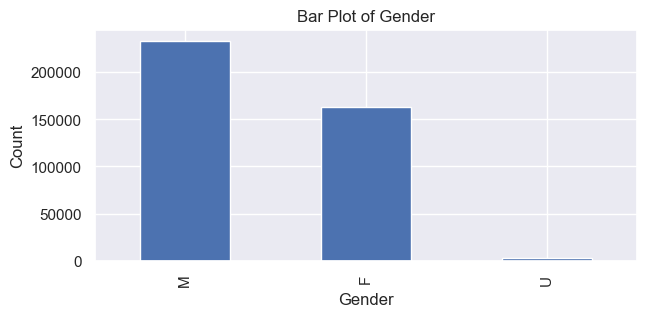

Medical Fee Region
object


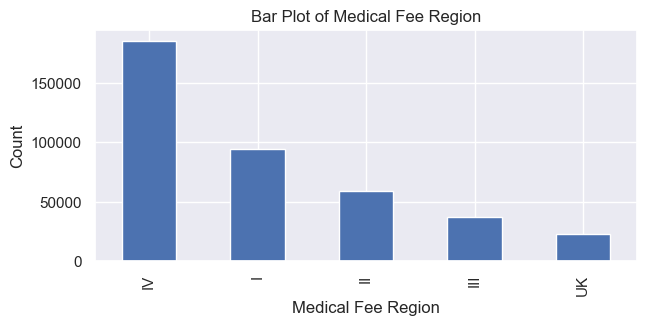

In [185]:
for feature in features_categorical:
    print(feature)
    print(X_train_processed[feature].dtype)
    X_train_processed[feature].value_counts().plot(kind='bar', figsize=(7, 3))
    plt.title(f'Bar Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

# 6. Feature Engineering <a class="anchor" id="chapter6"></a>

here we should think about creating new features

## 6.1. Carrier-District Interaction <a class="anchor" id="section_6_1"></a>
Combining Carrier Type with District Name may reveal regional preferences for certain insurance carriers, which could be useful in understanding regional biases or regulations.

In [186]:
# Creating a new feature by combining Carrier Type and District Name
X_train_processed['Carrier_District_Interaction'] = X_train_processed['Carrier Type'] + "_" + X_train_processed['District Name']

#Apply to the val set
X_val_processed['Carrier_District_Interaction'] = X_val_processed['Carrier Type'] + "_" + X_val_processed['District Name']

# Apply to the test set
df_test_processed['Carrier_District_Interaction'] = df_test_processed['Carrier Type'] + "_" + df_test_processed['District Name']

In [187]:
df_train["Carrier Type"].unique()
print(df_train["District Name"].unique())
print(df_train["Industry Code"].unique())
print(df_train["Average Weekly Wage"].unique())

['SYRACUSE' 'ROCHESTER' 'ALBANY' 'HAUPPAUGE' 'NYC' 'BUFFALO' 'BINGHAMTON'
 'STATEWIDE']
[44. 23. 56. 62. 72. 61. 51. 31. 48. 45. 42. 53. 52. 49. 81. 92. 33. 54.
 32. 71. nan 22. 11. 21. 55.]
[   0.   1745.93 1434.8  ...  371.02 2277.28 1008.86]


## 6.2. Income Category  <a class="anchor" id="section_6_2"></a>

Creating categories for Average Weekly Wage can simplify the continuous nature of income into meaningful segments such as Low, Average, and High, which could help the model understand different socioeconomic statuses.

In [188]:
# Defining the bins and labels for categorizing income
income_bins = [-float('inf'), 500, 1000, float('inf')]
income_labels = ['Low Income', 'Average Income', 'High Income']

# Creating the new feature for income categories
X_train_processed['Income_Category'] = pd.cut(X_train_processed['Average Weekly Wage'], bins=income_bins, labels=income_labels)

# Apply to the val set
X_val_processed['Income_Category'] = pd.cut(X_val_processed['Average Weekly Wage'], bins=income_bins, labels=income_labels)

# Apply to the test set
df_test_processed['Income_Category'] = pd.cut(df_test_processed['Average Weekly Wage'], bins=income_bins, labels=income_labels)


## 6.3. Has First Hearing Date  <a class="anchor" id="section_6_3"></a>

Since First Hearing Date has a significant amount of missing values, transforming it into a binary feature (1 if it exists, 0 if it doesn't) will allow the model to consider the presence or absence of this date as a factor.


In [189]:
# Creating a binary feature indicating the presence of First Hearing Date
X_train_processed['Has_1st_Hearing_Date'] = X_train_processed['First Hearing Date'].notna().astype(int)

# Apply to the val set
X_val_processed['Has_1st_Hearing_Date'] = X_val_processed['First Hearing Date'].notna().astype(int)

# Apply to the test set
df_test_processed['Has_1st_Hearing_Date'] = df_test_processed['First Hearing Date'].notna().astype(int)


In [190]:
#Drop First Hearing Date from the train, val and test set
X_train_processed = X_train_processed.drop(columns=['First Hearing Date'])
X_val_processed = X_val_processed.drop(columns=['First Hearing Date'])
df_test_processed = df_test_processed.drop(columns=['First Hearing Date'])

## 6.4. Accident Quarter  <a class="anchor" id="section_6_4"></a>
Temporal data can often influence outcomes. Extracting the quarter of the accident (e.g., 1st, 2nd, etc.)

In [191]:
# Extracting the quarter of the Accident Date
X_train_processed['Accident_Quarter'] = pd.to_datetime(X_train_processed['Accident Date'], errors='coerce').dt.quarter

# Apply to the val set
X_val_processed['Accident_Quarter'] = pd.to_datetime(X_val_processed['Accident Date'], errors='coerce').dt.quarter

# Apply to the test set
df_test_processed['Accident_Quarter'] = pd.to_datetime(df_test_processed['Accident Date'], errors='coerce').dt.quarter

## 6.5. Accident Year <a class="anchor" id="section_6_5"></a>
The year can help the model understand seasonal or yearly effects, like accident patterns during different times of the year.

In [192]:
# Extracting the year from the Accident Date
X_train_processed['Accident_Year'] = pd.to_datetime(X_train_processed['Accident Date'], errors='coerce').dt.year

#Apply to the val set
X_val_processed['Accident_Year'] = pd.to_datetime(X_val_processed['Accident Date'], errors='coerce').dt.year

# Apply to the test set
df_test_processed['Accident_Year'] = pd.to_datetime(df_test_processed['Accident Date'], errors='coerce').dt.year

## 6.6. Reporting_Delay <a class="anchor" id="section_6_6"></a>

Calculating the number of days between Assembly Date and Accident Date could reveal useful information regarding the time elapsed between key events, which might be an important factor in modeling outcomes.

In [193]:
# Converting dates to datetime format
X_train_processed['Accident Date'] = pd.to_datetime(X_train_processed['Accident Date'], errors='coerce')
X_train_processed['Assembly Date'] = pd.to_datetime(X_train_processed['Assembly Date'], errors='coerce')

# Calculating the difference in days between Assembly Date and Accident Date
X_train_processed.loc[:, 'Reporting_Delay'] = (X_train_processed['Accident Date'] - X_train_processed['Assembly Date']).dt.days

#Apply to the val set
X_val_processed['Accident Date'] = pd.to_datetime(X_val_processed['Accident Date'], errors='coerce')
X_val_processed['Assembly Date'] = pd.to_datetime(X_val_processed['Assembly Date'], errors='coerce')

X_val_processed.loc[:, 'Reporting_Delay'] = (X_val_processed['Accident Date'] - X_val_processed['Assembly Date']).dt.days

# Apply to the test set
df_test_processed['Accident Date'] = pd.to_datetime(df_test_processed['Accident Date'], errors='coerce')    
df_test_processed['Assembly Date'] = pd.to_datetime(df_test_processed['Assembly Date'], errors='coerce')

df_test_processed.loc[:, 'Reporting_Delay'] = (df_test_processed['Accident Date'] - df_test_processed['Assembly Date']).dt.days 


## 6.7. Accident on Day and Weekend <a class="anchor" id="section_6_7"></a>

The day of the accident could be significant. Weekends might have different risk factors compared to weekdays.

In [194]:
# Extracting the day of the week and creating a feature to indicate if the accident occurred on a weekend
X_train_processed['Accident Day'] = pd.to_datetime(X_train_processed['Accident Date'], errors='coerce').dt.dayofweek
X_train_processed['Accident on Weekend'] = X_train_processed['Accident Day'].apply(lambda x: 1 if x >= 5 else 0)

#Apply to the val set
X_val_processed['Accident Day'] = pd.to_datetime(X_val_processed['Accident Date'], errors='coerce').dt.dayofweek
X_val_processed['Accident on Weekend'] = X_val_processed['Accident Day'].apply(lambda x: 1 if x >= 5 else 0)

# Apply to the test set
df_test_processed['Accident Day'] = pd.to_datetime(df_test_processed['Accident Date'], errors='coerce').dt.dayofweek    
df_test_processed['Accident on Weekend'] = df_test_processed['Accident Day'].apply(lambda x: 1 if x >= 5 else 0)

## 6.8. Age Group <a class="anchor" id="section_6_8"></a>

Grouping ages can help simplify the model’s understanding of different age demographics (e.g., Youth, Adult, Senior). This could potentially improve model interpretability and performance.

In [195]:
# Creating bins and labels for age groups
age_bins = [0, 25, 45, 65, float('inf')]
age_labels = ['Youth', 'Young Adult', 'Middle Age', 'Senior']

# Creating a new feature for age groups
X_train_processed['Age Group'] = pd.cut(X_train_processed['Age at Injury'], bins=age_bins, labels=age_labels)

# Apply to the val set
X_val_processed['Age Group'] = pd.cut(X_val_processed['Age at Injury'], bins=age_bins, labels=age_labels)

# Apply to the test set
df_test_processed['Age Group'] = pd.cut(df_test_processed['Age at Injury'], bins=age_bins, labels=age_labels)

## 6.9. Time from Assembly Date to C-2 Filing <a class="anchor" id="section_6_9"></a>

This feature measures the time it took between assembling the claim and reaching the C-2 filing milestone. It indicates the duration for processing or verifying the claim between initial reporting and a formal milestone.


In [196]:
# Calculate the time from Assembly Date to C-2 Date (in days)
X_train_processed['Time_Assembly_to_C2'] = (X_train_processed['C-2 Date'] - X_train_processed['Assembly Date']).dt.days

#Apply to the val set
X_val_processed['Time_Assembly_to_C2'] = (X_val_processed['C-2 Date'] - X_val_processed['Assembly Date']).dt.days

# Apply to the test set
df_test_processed['Time_Assembly_to_C2'] = (df_test_processed['C-2 Date'] - df_test_processed['Assembly Date']).dt.days

## 6.10. Time from Accident to C-2 Filing <a class="anchor" id="section_6_10"></a>

This feature represents the delay between the accident itself and the C-2 event. This helps to understand the promptness of reporting or reacting to the injury

In [197]:
# Calculate the time from Accident Date to C-2 Date (in days)
X_train_processed['Time_Accident_to_C2'] = (X_train_processed['C-2 Date'] - X_train_processed['Accident Date']).dt.days

#Apply to the val set
X_val_processed['Time_Accident_to_C2'] = (X_val_processed['C-2 Date'] - X_val_processed['Accident Date']).dt.days

# Apply to the test set
df_test_processed['Time_Accident_to_C2'] = (df_test_processed['C-2 Date'] - df_test_processed['Accident Date']).dt.days

After creating new features based on the existing date columns, we will remove the original date features to avoid redundancy and simplify the dataset. We believe that the impact of these date features is adequately captured in the newly engineered features.

In [198]:
X_train_processed = X_train_processed.drop(columns=['Accident Date', 'Assembly Date', 'C-2 Date'])

#Apply to the val set
X_val_processed = X_val_processed.drop(columns=['Accident Date','Assembly Date', 'C-2 Date'])

# Apply to the test set
df_test_processed = df_test_processed.drop(columns=['Accident Date', 'Assembly Date', 'C-2 Date'])

## 6.11. ZIP Code Region <a class="anchor" id="section_6_11"></a>

The first two digits of the ZIP Code typically represent a broader region, which could provide some geographic insights without the granularity of the full ZIP Code. This simplification can make the model more interpretable and help reduce the feature dimensionality.

In [199]:
# Extracting the first two digits of the ZIP Code to create a region-based feature
X_train_processed['Zip Code Region'] = X_train_processed['Zip Code'].astype(str).str[:2]

# Apply to the val set
X_val_processed['Zip Code Region'] = X_val_processed['Zip Code'].astype(str).str[:2]

# Apply to the test set
df_test_processed['Zip Code Region'] = df_test_processed['Zip Code'].astype(str).str[:2]

In [200]:
X_train_processed['Zip Code'].nunique()

6969

In [201]:
X_train_processed['Zip Code Region'].nunique()

101

For this motive we will delete also the Zip Code, for now.

In [202]:
X_train_processed = X_train_processed.drop(columns=['Zip Code'])
#Apply to the val set
X_val_processed = X_val_processed.drop(columns=['Zip Code'])

# Apply to the test set
df_test_processed = df_test_processed.drop(columns=['Zip Code'])

## 6.12. Is UK Medical Fee Region <a class="anchor" id="section_6_12"></a>

he Medical Fee Region has a value UK, which indicates it is outside the typical US regions (like I, II, etc.). Creating a binary feature to flag if the region is UK or not can help the model differentiate between local and foreign medical fee regions

In [203]:
# Creating a binary feature indicating if Medical Fee Region is 'UK'
X_train_processed['Is_UK'] = X_train_processed['Medical Fee Region'].apply(lambda x: 1 if x == 'UK' else 0)

#Apply to the val set
X_val_processed['Is_UK'] = X_val_processed['Medical Fee Region'].apply(lambda x: 1 if x == 'UK' else 0)

# Apply to the test set
df_test_processed['Is_UK'] = df_test_processed['Medical Fee Region'].apply(lambda x: 1 if x == 'UK' else 0)

## 6.13. Carrier Type Merged <a class="anchor" id="section_6_13"></a>

Since there are several categories under "Special Fund" with very few occurrences, combining them into a single category can reduce noise in the data and make the feature more manageable for the model.

In [204]:
# Creating a new feature that merges all 'Special Fund' categories into a single category for train, validation, and test sets
for dataset in [X_train_processed, X_val_processed, df_test_processed]:
    dataset['Carrier Type Merged'] = dataset['Carrier Type'].replace({
        'SPECIAL FUND - UNKNOWN': 'SPECIAL FUND',
        'SPECIAL FUND - POI CARRIER WCB MENANDS': 'SPECIAL FUND',
        'SPECIAL FUND - CONS. COMM. (SECT. 25-A)': 'SPECIAL FUND'
    })

# Verifying the updated column for X_train_processed
print(X_train_processed['Carrier Type Merged'].value_counts())

Carrier Type Merged
PRIVATE         200348
SELF PUBLIC      84718
SIF              77317
SELF PRIVATE     36918
SPECIAL FUND       710
Name: count, dtype: int64


For now we will also delete the Carrier Type

In [205]:
X_train_processed = X_train_processed.drop(columns=['Carrier Type'])

#Apply to the val set
X_val_processed = X_val_processed.drop(columns=['Carrier Type'])

# Apply to the test set
df_test_processed = df_test_processed.drop(columns=['Carrier Type'])

## 6.14. Carrier_Name_Simplified <a class="anchor" id="section_6_14"></a>

The 'Carrier Name' feature has a high cardinality, which means there are many unique values—1951 in total. Having too many unique categories can cause problems in machine learning models, especially if some categories have very few instances. To simplify the analysis and improve the model performance, we will group carrier names with fewer than 3000 occurrences under a single category called 'OTHER'.


In [206]:
# Print the most frequent Carrier Names along with their counts
most_frequent_carriers = X_train_processed['Carrier Name'].value_counts().head(25)  # Adjust the number if you need more
print("Most frequent Carrier Names with their counts:")
print(most_frequent_carriers)

Most frequent Carrier Names with their counts:
Carrier Name
STATE INSURANCE FUND             77317
POLICE, FIRE, SANITATION         15022
AMERICAN ZURICH INSURANCE CO     12300
CHARTER OAK FIRE INS CO          12022
INDEMNITY INS. OF N AMERICA      10039
SAFETY NATIONAL CASUALTY CORP     9714
NEW HAMPSHIRE INSURANCE CO        8922
LM INSURANCE CORP                 8578
A I U INSURANCE COMPANY           7597
INDEMNITY INSURANCE CO OF         6357
NYC TRANSIT AUTHORITY             5702
HARTFORD ACCIDENT & INDEMNITY     5265
NEW YORK BLACK CAR OPERATORS'     5066
ARCH INDEMNITY INSURANCE CO.      4692
AIU INSURANCE CO                  4541
CNY OTHER THAN ED, HED WATER      4304
HEALTH & HOSPITAL CORP.           3891
ARCH INDEMNITY INSURANCE CO       3722
PENNSYLVANIA MANUFACTURERS'       3408
ACE AMERICAN INSURANCE CO.        3192
PUBLIC EMPLOYERS RISK MGMT.       3140
OLD REPUBLIC INSURANCE CO.        3006
MEMIC INDEMNITY COMPANY           2852
WAL-MART ASSOCIATES, INC.         2773
NY M

In [207]:
# Create a new feature called 'Carrier_Name_Simplified' based on 'Carrier Name' for train, validation, and test sets
X_train_processed['Carrier_Name_Simplified'] = X_train_processed['Carrier Name']
X_val_processed['Carrier_Name_Simplified'] = X_val_processed['Carrier Name']
df_test_processed['Carrier_Name_Simplified'] = df_test_processed['Carrier Name']

# Identify carrier names that occur fewer than 3000 times in X_train_processed
carrier_counts = X_train_processed['Carrier Name'].value_counts()
carriers_to_replace = carrier_counts[carrier_counts < 2500].index

# Replace carrier names with fewer than 3000 occurrences with 'OTHER' in all datasets using the identified carriers from X_train
for dataset in [X_train_processed, X_val_processed, df_test_processed]:
    dataset['Carrier_Name_Simplified'] = dataset['Carrier_Name_Simplified'].replace(carriers_to_replace, 'OTHER')

# Print the counts of the simplified carrier names in X_train_processed to verify the result
print("Counts of 'Carrier_Name_Simplified' feature in X_train_processed:")
print(X_train_processed['Carrier_Name_Simplified'].value_counts())


Counts of 'Carrier_Name_Simplified' feature in X_train_processed:
Carrier_Name_Simplified
OTHER                            168850
STATE INSURANCE FUND              77317
POLICE, FIRE, SANITATION          15022
AMERICAN ZURICH INSURANCE CO      12300
CHARTER OAK FIRE INS CO           12022
INDEMNITY INS. OF N AMERICA       10039
SAFETY NATIONAL CASUALTY CORP      9714
NEW HAMPSHIRE INSURANCE CO         8922
LM INSURANCE CORP                  8578
A I U INSURANCE COMPANY            7597
INDEMNITY INSURANCE CO OF          6357
NYC TRANSIT AUTHORITY              5702
HARTFORD ACCIDENT & INDEMNITY      5265
NEW YORK BLACK CAR OPERATORS'      5066
ARCH INDEMNITY INSURANCE CO.       4692
AIU INSURANCE CO                   4541
CNY OTHER THAN ED, HED WATER       4304
HEALTH & HOSPITAL CORP.            3891
ARCH INDEMNITY INSURANCE CO        3722
PENNSYLVANIA MANUFACTURERS'        3408
ACE AMERICAN INSURANCE CO.         3192
PUBLIC EMPLOYERS RISK MGMT.        3140
OLD REPUBLIC INSURANCE CO.    

In [ ]:
X_train_processed = X_train_processed.drop(columns=['Carrier Name'])

#Apply to the val set
X_val_processed = X_val_processed.drop(columns=['Carrier Name'])

# Apply to the test set
df_test_processed = df_test_processed.drop(columns=['Carrier Name'])

# 7. Feature Selection <a class="anchor" id="chapter7"></a>

In [ ]:
X_train_processed.describe(include='O').T

,count,unique,top,freq
County of Injury,400011,63,SUFFOLK,41927
District Name,400011,8,NYC,188591
Gender,400011,3,M,233496
Medical Fee Region,400011,5,IV,185382
Carrier_District_Interaction,400011,42,PRIVATE_NYC,92504
Zip Code Region,400011,101,11,143752
Carrier Type Merged,400011,5,PRIVATE,200348
Carrier_Name_Simplified,400011,28,OTHER,168850


In [ ]:
X_train_processed['Income_Category']

Claim Identifier
5419293    High Income
5558569    High Income
5802996    High Income
5755722    High Income
5861954    High Income
              ...     
5519564    High Income
5600292    High Income
5952685    High Income
5610809    High Income
5478788    High Income
Name: Income_Category, Length: 400011, dtype: category
Categories (3, object): ['Low Income' < 'Average Income' < 'High Income']

In [ ]:
X_train_processed.describe().T

,count,mean,std,min,25%,50%,75%,max
Age at Injury,400011.0,41.806963,13.305696,16.00,32.000,40.00,53.000000,80.0
Alternative Dispute Resolution,400011.0,0.004685,0.068286,0.00,0.000,0.00,0.000000,1.0
Attorney/Representative,400011.0,0.315296,0.464634,0.00,0.000,0.00,1.000000,1.0
Average Weekly Wage,400011.0,1223.410285,5309.249917,13.94,876.075,1173.12,1394.895415,2828079.0
COVID-19 Indicator,400011.0,0.047824,0.213393,0.00,0.000,0.00,0.000000,1.0
IME-4 Count,400011.0,0.739425,1.914216,0.00,0.000,0.00,0.000000,73.0
Industry Code,400011.0,58.536825,19.686671,11.00,45.000,61.00,62.000000,92.0
WCIO Cause of Injury Code,400011.0,54.356548,25.466260,1.00,31.000,56.00,75.000000,99.0
WCIO Nature of Injury Code,400011.0,41.274500,21.936451,1.00,25.000,49.00,52.000000,91.0
WCIO Part Of Body Code,400011.0,47.822347,22.769728,10.00,35.000,42.00,55.000000,101.0


In [ ]:
X_train_processed.columns

Index(['Age at Injury', 'Alternative Dispute Resolution',
       'Attorney/Representative', 'Average Weekly Wage', 'County of Injury',
       'COVID-19 Indicator', 'District Name', 'Gender', 'IME-4 Count',
       'Industry Code', 'Medical Fee Region', 'WCIO Cause of Injury Code',
       'WCIO Nature of Injury Code', 'WCIO Part Of Body Code',
       'Number of Dependents', 'Accident Year', 'Carrier_District_Interaction',
       'Income_Category', 'Has_1st_Hearing_Date', 'Accident_Quarter',
       'Accident_Year', 'Reporting_Delay', 'Accident Day',
       'Accident on Weekend', 'Age Group', 'Time_Assembly_to_C2',
       'Time_Accident_to_C2', 'Zip Code Region', 'Is_UK',
       'Carrier Type Merged', 'Carrier_Name_Simplified'],
      dtype='object')

In [ ]:
X_train_processed['Age Group']

Claim Identifier
5419293     Middle Age
5558569     Middle Age
5802996    Young Adult
5755722          Youth
5861954     Middle Age
              ...     
5519564    Young Adult
5600292    Young Adult
5952685    Young Adult
5610809     Middle Age
5478788     Middle Age
Name: Age Group, Length: 400011, dtype: category
Categories (4, object): ['Youth' < 'Young Adult' < 'Middle Age' < 'Senior']

In [ ]:
# Define the feature categories
categorical_columns = [
    'Carrier_Name_Simplified','County of Injury', 
    'District Name', 'Gender', 'Medical Fee Region', 
    'Carrier_District_Interaction',
    'Zip Code Region', 'Carrier Type Merged','Income_Category','Age Group', 'Industry Code', 
    'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 
    'WCIO Part Of Body Code'
]

binary_columns = [
    'Attorney/Representative', 'COVID-19 Indicator',
    'Has_1st_Hearing_Date', 'Accident on Weekend', 'Is_UK','Alternative Dispute Resolution'
]

discrete_columns = [ 'Number of Dependents', 'IME-4 Count',
    'Accident_Quarter', 'Accident_Year', 'Accident Day'
]

continuous_columns = ['Age at Injury', 
    'Average Weekly Wage', 'Reporting_Delay','Time_Assembly_to_C2', 'Time_Accident_to_C2'
]

# Printing the feature categories
print("Categorical Features:", categorical_columns)
print("Binary Features:", binary_columns)
print("Discrete Features:", discrete_columns)
print("Continuous Features:", continuous_columns)

Categorical Features: ['Carrier_Name_Simplified', 'County of Injury', 'District Name', 'Gender', 'Medical Fee Region', 'Carrier_District_Interaction', 'Zip Code Region', 'Carrier Type Merged', 'Income_Category', 'Age Group', 'Industry Code', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code']
Binary Features: ['Attorney/Representative', 'COVID-19 Indicator', 'Has_1st_Hearing_Date', 'Accident on Weekend', 'Is_UK', 'Alternative Dispute Resolution']
Discrete Features: ['Number of Dependents', 'IME-4 Count', 'Accident_Quarter', 'Accident_Year', 'Accident Day']
Continuous Features: ['Age at Injury', 'Average Weekly Wage', 'Reporting_Delay', 'Time_Assembly_to_C2', 'Time_Accident_to_C2']


## 7.1. Preparing Data</b> <a class="anchor" id="section_7_1"></a>


In [ ]:
# Convert discrete columns to integer
for column in discrete_columns:
    X_train_processed[column] = X_train_processed[column].astype(int)
    X_val_processed[column] = X_val_processed[column].astype(int)
    df_test_processed[column] = df_test_processed[column].astype(int)

In [ ]:
#scaling features
# Usar robustscaler para dados que contêm outliers
# Usar minmaxscaler para dados que não têm outliers (conversa do chatgpt)
from sklearn.preprocessing import RobustScaler
feat_scaler = RobustScaler()
X_train_processed[discrete_columns + continuous_columns] = feat_scaler.fit_transform(X_train_processed[discrete_columns + continuous_columns])

X_train_num_scaled = X_train_processed[discrete_columns + continuous_columns]

#apply same transformation for val data
X_val_processed[discrete_columns + continuous_columns] = feat_scaler.transform(X_val_processed[discrete_columns + continuous_columns])

X_val_num_scaled = X_val_processed[discrete_columns + continuous_columns]

#apply same transformation for test data
df_test_processed[discrete_columns + continuous_columns] = feat_scaler.transform(df_test_processed[discrete_columns + continuous_columns])
df_test_num_scaled = df_test_processed[discrete_columns + continuous_columns]

#X_val, X_train
X_train_num_scaled

,Number of Dependents,IME-4 Count,Accident_Quarter,Accident_Year,Accident Day,Age at Injury,Average Weekly Wage,Reporting_Delay,Time_Assembly_to_C2,Time_Accident_to_C2
Claim Identifier,,,,,,,,,,
5419293,0.50,0.0,-1.0,-0.5,0.333333,0.523810,0.070124,-0.40,-3.0,0.208333
5558569,0.75,0.0,0.0,-0.5,0.333333,1.142857,0.975432,0.25,-1.0,-0.250000
5802996,0.25,0.0,0.0,0.0,-0.333333,-0.380952,0.758459,0.00,102.0,4.250000
5755722,0.25,0.0,-0.5,0.0,-0.666667,-0.714286,0.163294,0.45,0.0,-0.375000
5861954,0.75,0.0,0.0,0.0,-0.666667,1.047619,-0.196671,-3.55,0.0,2.958333
...,...,...,...,...,...,...,...,...,...,...
5519564,0.75,0.0,0.5,-1.0,1.333333,-0.476190,0.163294,-10.40,10.0,9.083333
5600292,0.75,0.0,0.5,-0.5,0.666667,-0.333333,0.163294,-0.35,0.0,0.291667
5952685,-0.25,0.0,-1.0,0.5,0.333333,-0.380952,0.975432,-0.25,-1.0,0.166667


In [ ]:
X_train_num_scaled.var()

Number of Dependents        0.250223
IME-4 Count                 3.664225
Accident_Quarter            0.319036
Accident_Year               0.831731
Accident Day                0.371636
Age at Injury               0.401455
Average Weekly Wage       104.720625
Reporting_Delay           867.529909
Time_Assembly_to_C2     66345.525321
Time_Accident_to_C2       502.636192
dtype: float64

 ## 7.2. Numerical Features</b> <a class="anchor" id="section_7_2"></a>

 > ### Spearman and Pearson correlation matrix <a class="anchor" id="sub_section_4_1_2"></a>

In [ ]:
def cor_heatmap(cor, name):
    plt.figure(figsize=(18,12))
    sns.heatmap(data = cor.round(2), annot = True, cmap = 'viridis', linecolor = 'white', linewidth=0.5, fmt='.2', mask=np.triu(cor, k=0))
    plt.title(f'{name} Correlation Matrix', fontdict = {'fontsize': 20})
    plt.show()

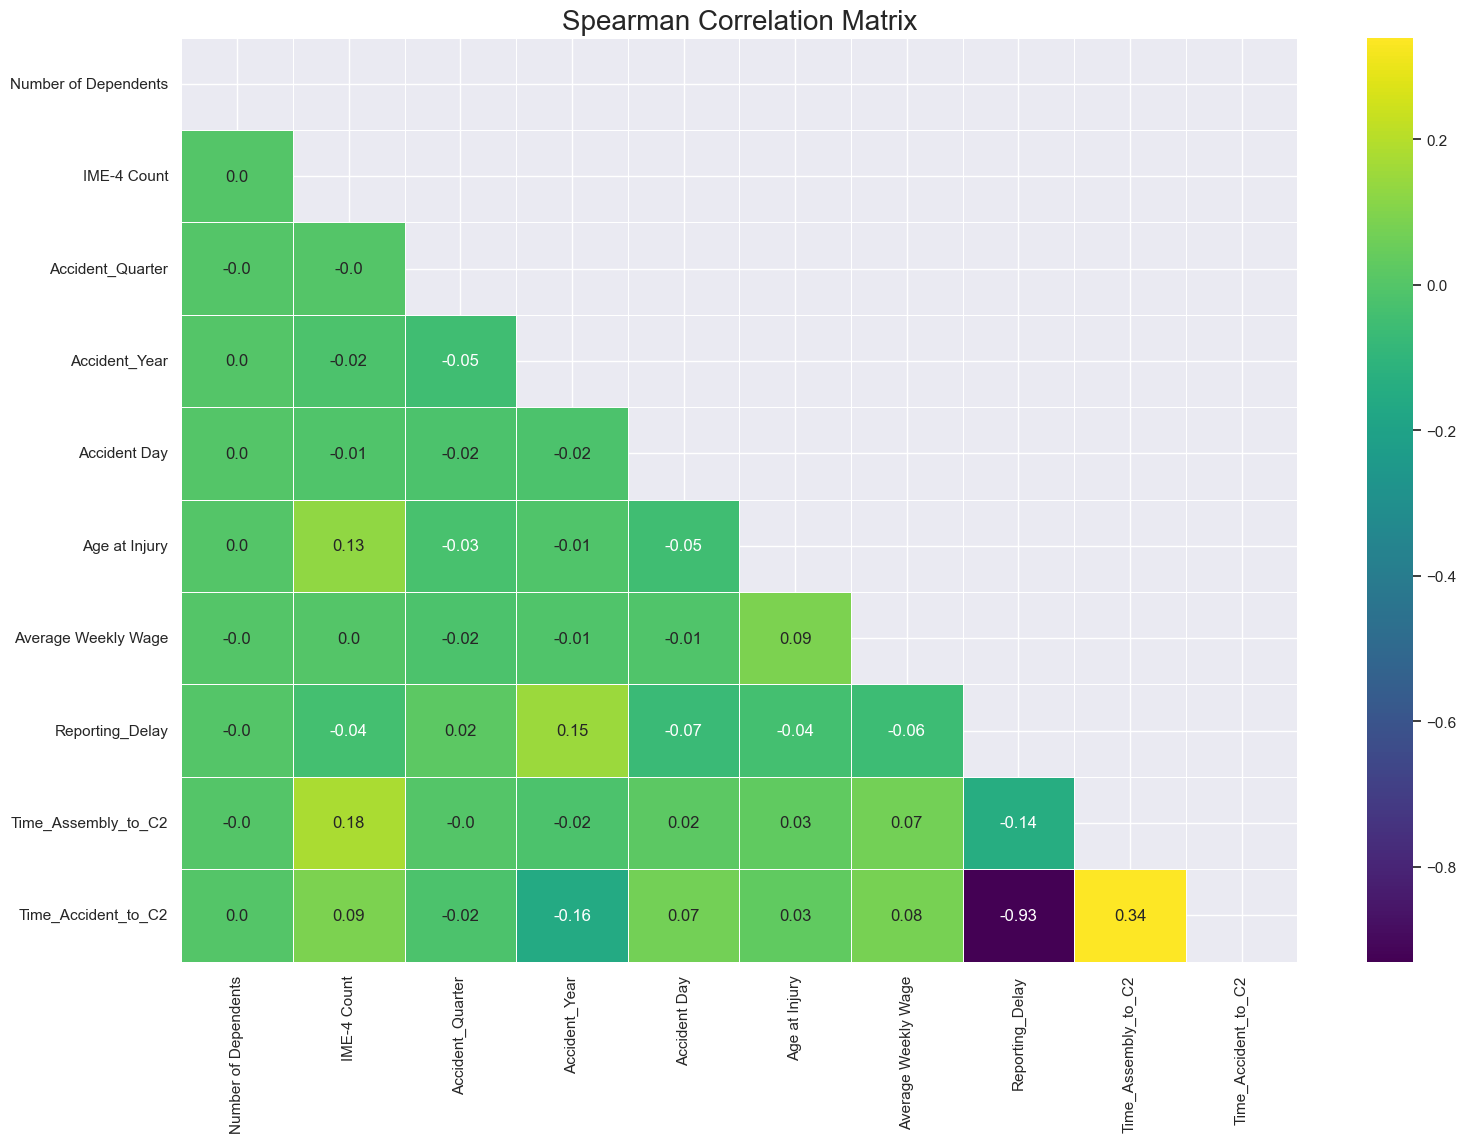

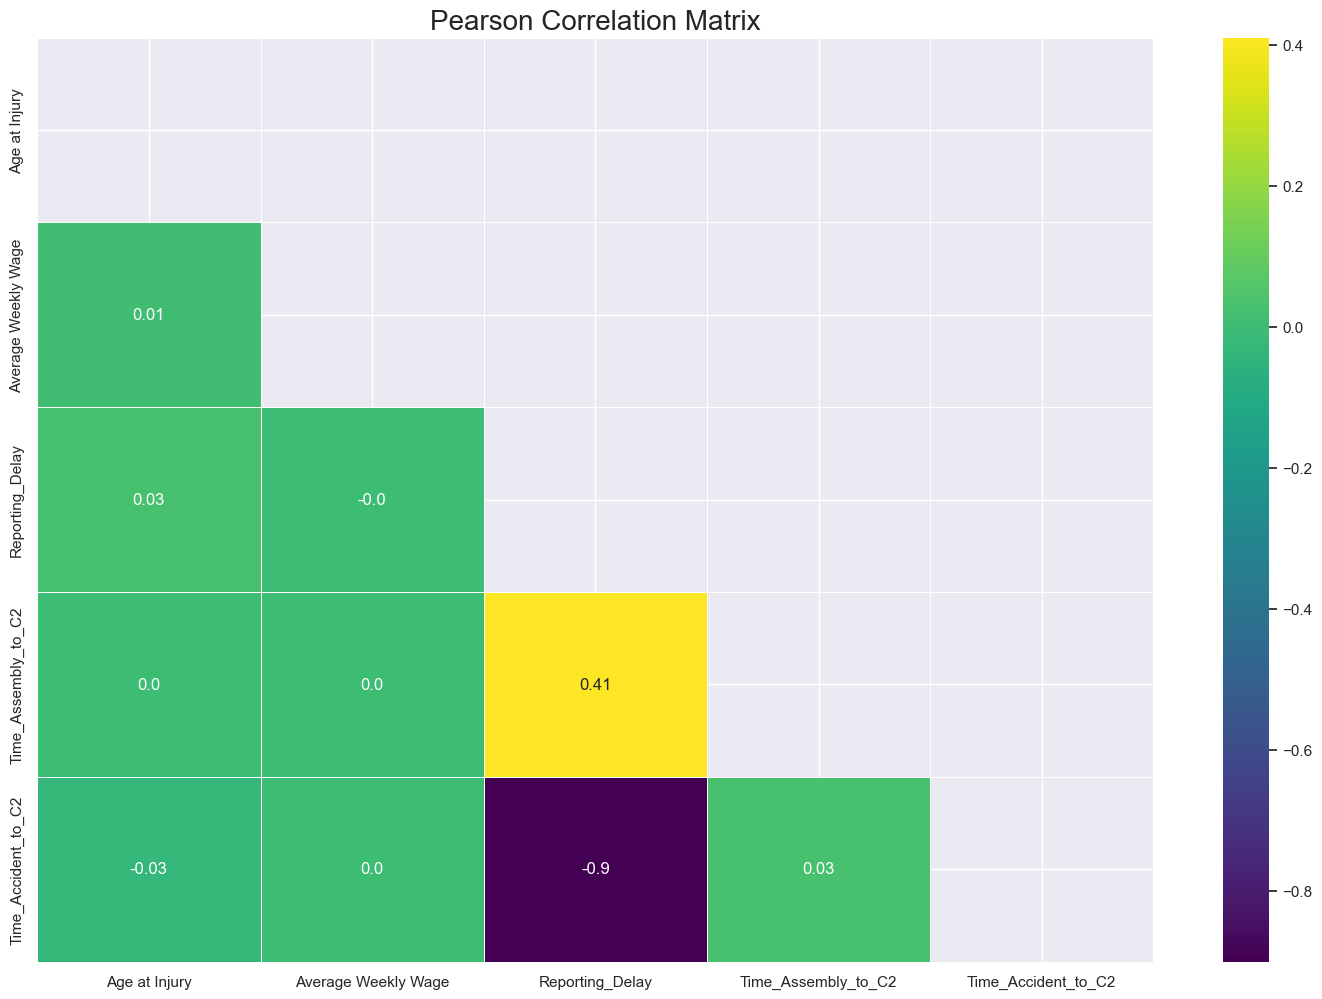

In [ ]:
corr_data_numerical = X_train_num_scaled 
corr_data_continuous = X_train_num_scaled[continuous_columns]
cor_spearman = corr_data_numerical.corr(method='spearman')
cor_pearson = corr_data_continuous.corr(method='pearson')

cor_heatmap(cor_spearman, 'Spearman')
cor_heatmap(cor_pearson, 'Pearson')

 > ### LASSO Regression <a class="anchor" id="sub_section_4_1_3"></a>

In [ ]:
#fit regression
reg = LassoCV().fit(X_train_num_scaled, y_train)
#get coefficients
coef = pd.Series(reg.coef_, index = X_train_num_scaled.columns)
#obtain coef values
coef.sort_values()

Accident_Year          -0.007753
Reporting_Delay        -0.000483
Time_Assembly_to_C2    -0.000185
Number of Dependents   -0.000000
Accident_Quarter        0.000000
Accident Day           -0.000000
Time_Accident_to_C2     0.000000
Average Weekly Wage     0.000060
Age at Injury           0.067368
IME-4 Count             0.390461
dtype: float64

In [ ]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(3,5))
    imp_coef.plot(kind = "barh", color='c')
    plt.title("Feature importance using " + name + " Model")
    plt.show()

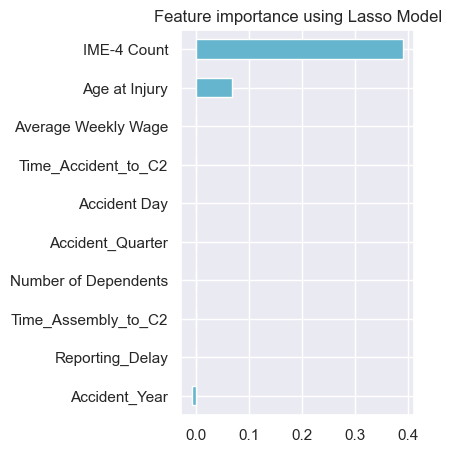

In [ ]:
plot_importance(coef,'Lasso')

 > ### Recursive Feature Elimination - RFE <a class="anchor" id="sub_section_4_1_4"></a>

In [ ]:
X_train_num_scaled.columns

Index(['Number of Dependents', 'IME-4 Count', 'Accident_Quarter',
       'Accident_Year', 'Accident Day', 'Age at Injury', 'Average Weekly Wage',
       'Reporting_Delay', 'Time_Assembly_to_C2', 'Time_Accident_to_C2'],
      dtype='object')

## o rfe demora

In [ ]:
# Number of features
nof_list=np.arange(1,10)            
high_score=0
# Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    model = LogisticRegression()
    rfe = RFE(model,n_features_to_select = nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train_num_scaled,y_train)
    X_val_rfe = rfe.transform(X_val_num_scaled)
    model.fit(X_train_rfe,y_train)
    
    score = model.score(X_val_rfe,y_val)
    score_list.append(score)
    
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 8
Score with 8 features: 0.626428


In [ ]:
#rfscv- to select 1st the number of features we should select
model = LogisticRegression()
rfe = RFE(estimator = model, n_features_to_select = 7)

In [ ]:
X_rfe= rfe.fit_transform(X=X_train_num_scaled, y=y_train)

In [ ]:
selected_features = pd.Series(rfe.support_, index = X_train_num_scaled.columns)
selected_features

Number of Dependents    False
IME-4 Count              True
Accident_Quarter         True
Accident_Year            True
Accident Day             True
Age at Injury            True
Average Weekly Wage      True
Reporting_Delay          True
Time_Assembly_to_C2     False
Time_Accident_to_C2     False
dtype: bool

# rfe com SVM - esteve a correr pelo menos 9h, depois posso deixar correr um dia inteiro

In [ ]:
# #no of features
# nof_list=np.arange(1,12)            
# high_score=0
# #Variable to store the optimum features
# nof=0           
# train_score_list =[]
# val_score_list = []

# for n in range(len(nof_list)):
#     #call support vector machines classifier
#     model = SVC(kernel = 'linear')
    
#     #create RFE instance
#     rfe = RFE(estimator = model,n_features_to_select = nof_list[n])
    
#     #fit and transform for training data, transform for val data
#     X_train_rfe = rfe.fit_transform(X_train_num_scaled,y_train)
#     X_val_rfe = rfe.transform(X_val_num_scaled)
    
#     model.fit(X_train_rfe,y_train)
    
#     #storing results on training data
#     train_score = model.score(X_train_rfe,y_train)
#     train_score_list.append(train_score)
    
#     #storing results on training data
#     val_score = model.score(X_val_rfe,y_val)
#     val_score_list.append(val_score)
    
#     #check best score
#     if(val_score > high_score):
#         high_score = val_score
#         nof = nof_list[n]
        
#         #adding mention of variables to keep
#         features_to_select = pd.Series(rfe.support_, index = X_train_num_scaled.columns)
        
# print("Optimum number of features: %d" %nof)
# print("Score with %d features: %f" % (nof, high_score))
# print(f"Features to select: \n{features_to_select}")

## 7.3. Categorical Features</b> <a class="anchor" id="section_7_3"></a>
Chi-squared and MIC for the categorical ones.

 > ### $\chi ^2$ Test for Independence <a class="anchor" id="sub_section_4_2_1"></a>

In [ ]:
categorical_columns

['Carrier_Name_Simplified',
 'County of Injury',
 'District Name',
 'Gender',
 'Medical Fee Region',
 'Carrier_District_Interaction',
 'Zip Code Region',
 'Carrier Type Merged',
 'Income_Category',
 'Age Group',
 'Industry Code',
 'WCIO Cause of Injury Code',
 'WCIO Nature of Injury Code',
 'WCIO Part Of Body Code']

In [ ]:
binary_columns

['Attorney/Representative',
 'COVID-19 Indicator',
 'Has_1st_Hearing_Date',
 'Accident on Weekend',
 'Is_UK',
 'Alternative Dispute Resolution']

In [ ]:
from sklearn.preprocessing import LabelEncoder

## for now lets use label encoder but that does not makes much more sense because we dont have an order... we need to use one hot encoder byt it will increase the dimensionality of the data

# Initialize a LabelEncoder
label_encoders = {}

# Apply LabelEncoder to each categorical column in training and then transform validation and test datasets
for col in categorical_columns:
    le = LabelEncoder()
    
    # Fit LabelEncoder on the training data
    X_train_processed[col] = le.fit_transform(X_train_processed[col])
    
    # Handle unseen labels in validation and test data
    # Add an "Unknown" label to classes to handle unseen labels
    le.classes_ = np.append(le.classes_, 'Unknown')

    # Replace unseen labels in validation and test data with 'Unknown'
    X_val_processed[col] = X_val_processed[col].apply(lambda x: x if x in le.classes_ else 'Unknown')
    df_test_processed[col] = df_test_processed[col].apply(lambda x: x if x in le.classes_ else 'Unknown')

    # Transform validation and test datasets using the fitted label encoder
    X_val_processed[col] = le.transform(X_val_processed[col])
    df_test_processed[col] = le.transform(df_test_processed[col])

    # Store the label encoder for future use if needed
    label_encoders[col] = le

In [ ]:
categorical_columns_with_binary = categorical_columns + binary_columns
len(categorical_columns_with_binary)

20

In [ ]:
categorical_columns_with_binary

['Carrier_Name_Simplified',
 'County of Injury',
 'District Name',
 'Gender',
 'Medical Fee Region',
 'Carrier_District_Interaction',
 'Zip Code Region',
 'Carrier Type Merged',
 'Income_Category',
 'Age Group',
 'Industry Code',
 'WCIO Cause of Injury Code',
 'WCIO Nature of Injury Code',
 'WCIO Part Of Body Code',
 'Attorney/Representative',
 'COVID-19 Indicator',
 'Has_1st_Hearing_Date',
 'Accident on Weekend',
 'Is_UK',
 'Alternative Dispute Resolution']

In [ ]:
#Chi-square test
threshold = 14 #we want to only keep the 10 most relevant features
high_score_features_chi2 = []
scores = []
names_Chi2 = []

feature_scores = SelectKBest(chi2, k=threshold).fit(X_train_processed[categorical_columns_with_binary],y_train).scores_

high_score_features = []
for score, f_name in sorted(zip(feature_scores,X_train_processed[categorical_columns_with_binary].columns), reverse=True)[:threshold]:
        high_score_features_chi2.append(f_name)
        scores.append(score)
        names_Chi2.append(f_name)

In [ ]:
names_Chi2

['Attorney/Representative',
 'Has_1st_Hearing_Date',
 'Carrier_District_Interaction',
 'WCIO Nature of Injury Code',
 'WCIO Part Of Body Code',
 'Industry Code',
 'WCIO Cause of Injury Code',
 'Carrier Type Merged',
 'COVID-19 Indicator',
 'Age Group',
 'Carrier_Name_Simplified',
 'Medical Fee Region',
 'County of Injury',
 'Alternative Dispute Resolution']

> ### Mutual Information Criterion <a class="anchor" id="sub_section_4_2_2"></a>

In [ ]:
 #MIC 
threshold = 14 #we want to only keep the 10 most relevant features
high_score_features_MIC = []
scores = []
names_MIC = []
feature_scores = mutual_info_classif(X_train_processed[categorical_columns_with_binary],y_train, random_state=0)
for score, f_name in sorted(zip(feature_scores, X_train_processed[categorical_columns_with_binary].columns), reverse=True)[:threshold]:
        high_score_features_MIC.append(f_name)
        scores.append(score)
        names_MIC.append(f_name)

In [ ]:
names_MIC

['Attorney/Representative',
 'Has_1st_Hearing_Date',
 'WCIO Part Of Body Code',
 'WCIO Nature of Injury Code',
 'WCIO Cause of Injury Code',
 'Income_Category',
 'Carrier_Name_Simplified',
 'Industry Code',
 'Carrier_District_Interaction',
 'Carrier Type Merged',
 'Age Group',
 'District Name',
 'Gender',
 'Medical Fee Region']

In [ ]:
common_categorical_features = list(set(names_Chi2).intersection(list(names_MIC)))
features_selected = common_categorical_features

In [ ]:
features_selected

['Medical Fee Region',
 'Attorney/Representative',
 'WCIO Part Of Body Code',
 'WCIO Cause of Injury Code',
 'WCIO Nature of Injury Code',
 'Carrier_Name_Simplified',
 'Carrier_District_Interaction',
 'Has_1st_Hearing_Date',
 'Age Group',
 'Industry Code',
 'Carrier Type Merged']

In [ ]:
categorical_columns_with_binary

['Carrier_Name_Simplified',
 'County of Injury',
 'District Name',
 'Gender',
 'Medical Fee Region',
 'Carrier_District_Interaction',
 'Zip Code Region',
 'Carrier Type Merged',
 'Income_Category',
 'Age Group',
 'Industry Code',
 'WCIO Cause of Injury Code',
 'WCIO Nature of Injury Code',
 'WCIO Part Of Body Code',
 'Attorney/Representative',
 'COVID-19 Indicator',
 'Has_1st_Hearing_Date',
 'Accident on Weekend',
 'Is_UK',
 'Alternative Dispute Resolution']

## 7.4. Final Features</b> <a class="anchor" id="section_7_4"></a>

Make that beautiful table, where we say in which case we reject each variable and then the final decision


| Predictor                | Spearman | Lasso  | RFE LR | RFE SVM | What to do? (One possible way to "solve")              |
|--------------------------|----------|--------|--------|---------|--------------------------------------------------------|
| Number of Dependents     | Keep     | Discard| Discard|         | Discard                                                |
| IME-4 Count              | Keep     | Keep   | Keep   |         | Include in the model                                   |
| Accident_Quarter         | Keep     | Discard| Keep   |         | Consider including if adds value                       |
| Accident_Year            | Keep     | Discard| Discard|         | Discard                                                |
| Accident Day             | Keep     | Discard| Keep   |         | Consider including if adds value                       |
| Age at Injury            | Keep     | Keep   | Keep   |         | Include in the model                                   |
| Average Weekly Wage      | Keep     | Discard| Keep   |         | Consider including if adds value                       |
| Reporting_Delay          | Keep     | Discard| Keep   |         | Consider including if adds value                       |
| Time_Assembly_to_C2      | High Correlation | Discard| Discard|         | Discard                                                |
| Time_Accident_to_C2      | High Correlation | Discard| Keep   |         | Discard                      |

| Predictor                   | X²       | MIC     | What to do? (One possible way to "solve")              |
|-----------------------------|----------|---------|--------------------------------------------------------|
| Carrier_Name_Simplified     | Keep     | Keep    | Include in the model                                   |
| County of Injury            | Keep     | Discard | Consider including if adds value                       |
| District Name               | Discard  | Keep    | Consider including if adds value                       |
| Gender                      | Discard  | Keep    | Consider including if adds value                       |
| Medical Fee Region          | Keep     | Keep    | Include in the model                                   |
| Carrier_District_Interaction| Keep     | Keep    | Include in the model                                   |
| Zip Code Region             | Discard  | Discard | Discard                                                |
| Carrier Type Merged         | Keep     | Keep    | Include in the model                                   |
| Income_Category             | Discard  | Keep    | Consider including if adds value                       |
| Age Group                   | Keep     | Keep    | Include in the model                                   |
| Attorney/Representative     | Keep     | Keep    | Include in the model                                   |
| COVID-19 Indicator          | Keep     | Discard | Consider including if adds value                       |
| Has_1st_Hearing_Date        | Keep     | Keep    | Include in the model                                   |
| Accident on Weekend         | Discard  | Discard | Discard                                                |
| Is_UK                       | Discard  | Discard | Discard                                                |
| Alternative Dispute Resolution | Keep  | Discard | Consider including if adds value                       |
| WCIO Cause of Injury Code   | Keep     | Keep    | Include in the model                                   |
| WCIO Nature of Injury Code  | Keep     | Keep    | Include in the model                                   |
| WCIO Part Of Body Code      | Keep     | Keep    | Include in the model                                   |
| Industry Code               | Keep     | Keep    | Include in the model                                   |

In [ ]:
# 1. `final_features_df` for final selected features
# 2. `potential_value_df` for features that are potentially valuable

# Defining the lists of features based on the provided decisions
final_features = [
    "WCIO Cause of Injury Code",
    "WCIO Part Of Body Code",
    "Age at Injury",
    "IME-4 Count",
    "Carrier_District_Interaction",
    "Carrier Type Merged",
    "Age Group",
    "Medical Fee Region",
    "Attorney/Representative",
    "Has_1st_Hearing_Date",
    "Industry Code"
]

potential_value_features = [
    "County of Injury",
    "Accident_Quarter",
    "Accident Day",
    "Average Weekly Wage",
    "Reporting_Delay",
    "WCIO Nature of Injury Code",
    "Income_Category",
    "COVID-19 Indicator",
    "Alternative Dispute Resolution",
    "District Name",
    "Gender"
]

# Selecting final features
final_features_X_train = X_train_processed[final_features]
    
# Selecting features with potential value
potential_value_X_train = X_train_processed[final_features + potential_value_features]

# Same for validation
# Selecting final features
final_features_X_val = X_val_processed[final_features]
    
# Selecting features with potential value
potential_value_X_val = X_val_processed[final_features + potential_value_features]

#Same for test
# Selecting final features
final_features_df_test  = df_test_processed[final_features]
    
# Selecting features with potential value
potential_value_df_test = df_test_processed[final_features + potential_value_features]



# 8. Modeling <a class="anchor" id="chapter8"></a>


> ### Logistic  Regression

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Define a function to print metrics and plot a colorful confusion matrix
def metrics(y_train, pred_train, y_val, pred_val):
    # Print classification report for training data
    print('___________________________________________________________________________________________________________')
    print('                                                     TRAIN                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_train, pred_train))
    train_cm = confusion_matrix(y_train, pred_train)
    print(train_cm)
    
    # Plot confusion matrix for training data
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.heatmap(train_cm, annot=True, cmap='Blues', fmt='d', cbar=False)
    plt.title('Training Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    
    # Print classification report for validation data
    print('___________________________________________________________________________________________________________')
    print('                                                VALIDATION                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_val, pred_val))
    val_cm = confusion_matrix(y_val, pred_val)
    print(val_cm)

    # Plot confusion matrix for validation data
    plt.subplot(1, 2, 2)
    sns.heatmap(val_cm, annot=True, cmap='Oranges', fmt='d', cbar=False)
    plt.title('Validation Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    
    # Show the plots
    plt.tight_layout()
    plt.show()



In [ ]:
# Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Metrics for Logistic Regression
log_reg.fit(final_features_X_train, y_train)
pred_train_log_final = log_reg.predict(final_features_X_train)
pred_val_log_final = log_reg.predict(final_features_X_val)
metrics(y_train, pred_train_log_final, y_val, pred_val_log_final)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.13      0.00      0.01      8684
           1       0.00      0.00      0.00       319
           2       0.33      0.01      0.01     47902
           3       0.69      0.95      0.80    203272
           4       0.00      0.00      0.00      2931
           5       0.49      0.26      0.34     33246
           6       0.00      0.00      0.00        66
           7       0.55      0.53      0.54    103591

    accuracy                           0.64    400011
   macro avg       0.27      0.22      0.21    400011
weighted avg       0.57      0.64      0.58    400011

[[    31      0     11   

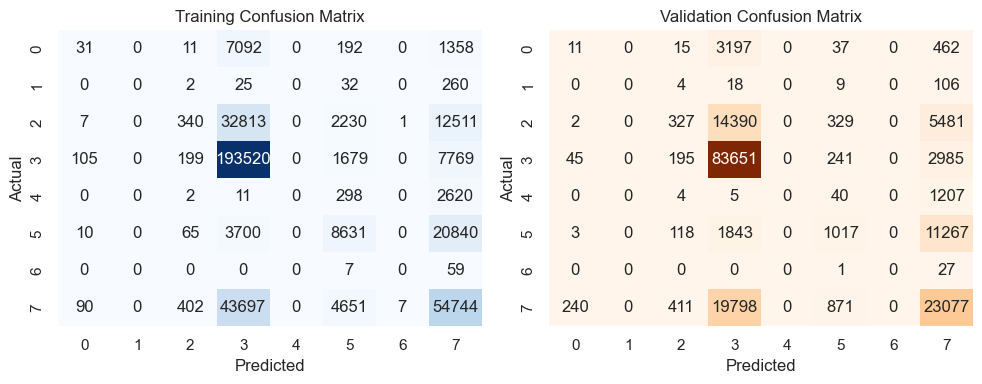

In [ ]:
# Fit model with final features and potential value features
log_reg.fit(potential_value_X_train, y_train)
y_pred_log_potential = log_reg.predict(potential_value_X_val)

log_reg.fit(potential_value_X_train, y_train)
pred_train_log_potential = log_reg.predict(potential_value_X_train)
pred_val_log_potential = log_reg.predict(potential_value_X_val)
metrics(y_train, pred_train_log_potential, y_val, pred_val_log_potential)

> ### Decision Trees 

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.89      0.86      8684
           1       0.90      0.95      0.92       319
           2       0.92      0.95      0.94     47902
           3       0.97      0.98      0.97    203272
           4       0.97      0.98      0.98      2931
           5       0.98      0.98      0.98     33246
           6       1.00      1.00      1.00        66
           7       0.99      0.94      0.96    103591

    accuracy                           0.96    400011
   macro avg       0.94      0.96      0.95    400011
weighted avg       0.97      0.96      0.96    400011

[[  7738      0     12   

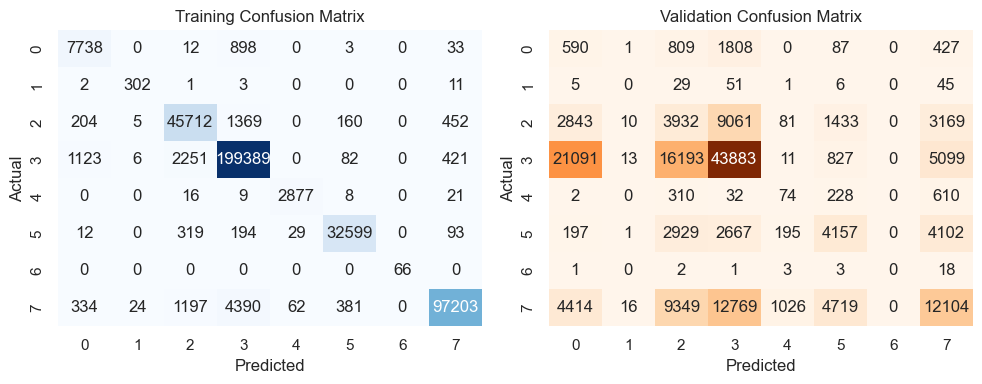

In [ ]:
# Decision Tree Model
dt = DecisionTreeClassifier(random_state=42)

# Fit model with final features
dt.fit(final_features_X_train, y_train)
y_pred_dt_final = dt.predict(final_features_X_val)

# Metrics for Decision Tree
dt.fit(final_features_X_train, y_train)
pred_train_dt_final = dt.predict(final_features_X_train)
pred_val_dt_final = dt.predict(final_features_X_val)
metrics(y_train, pred_train_dt_final, y_val, pred_val_dt_final)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8684
           1       1.00      1.00      1.00       319
           2       1.00      1.00      1.00     47902
           3       1.00      1.00      1.00    203272
           4       1.00      1.00      1.00      2931
           5       1.00      1.00      1.00     33246
           6       1.00      1.00      1.00        66
           7       1.00      1.00      1.00    103591

    accuracy                           1.00    400011
   macro avg       1.00      1.00      1.00    400011
weighted avg       1.00      1.00      1.00    400011

[[  8684      0      0   

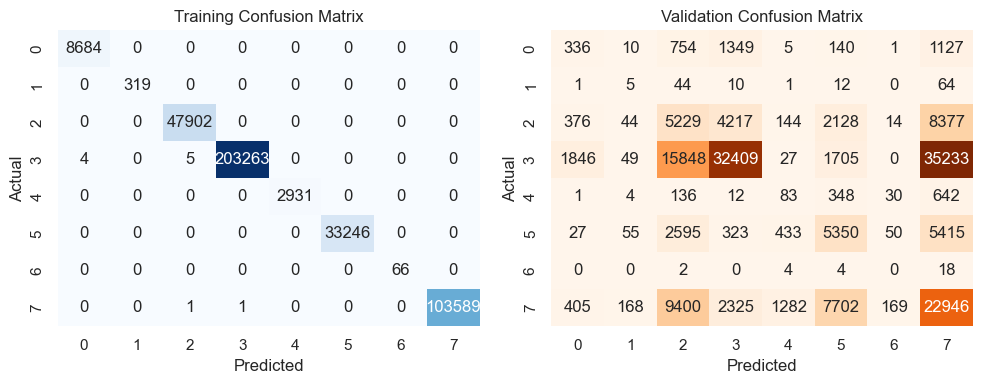

In [ ]:
# Fit model with final features and potential value features
dt.fit(potential_value_X_train, y_train)
y_pred_dt_potential = dt.predict(potential_value_X_val)

dt.fit(potential_value_X_train, y_train)
pred_train_dt_potential = dt.predict(potential_value_X_train)
pred_val_dt_potential = dt.predict(potential_value_X_val)
metrics(y_train, pred_train_dt_potential, y_val, pred_val_dt_potential)

Fit Decision Tree model with pruning parameters for final features and potential value features since we have overfitting

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.52      0.19      0.28      8684
           1       0.00      0.00      0.00       319
           2       0.45      0.06      0.10     47902
           3       0.72      0.94      0.81    203272
           4       0.00      0.00      0.00      2931
           5       0.63      0.47      0.53     33246
           6       0.00      0.00      0.00        66
           7       0.58      0.56      0.57    103591

    accuracy                           0.67    400011
   macro avg       0.36      0.28      0.29    400011
weighted avg       0.63      0.67      0.62    400011

[[  1627      0    161   

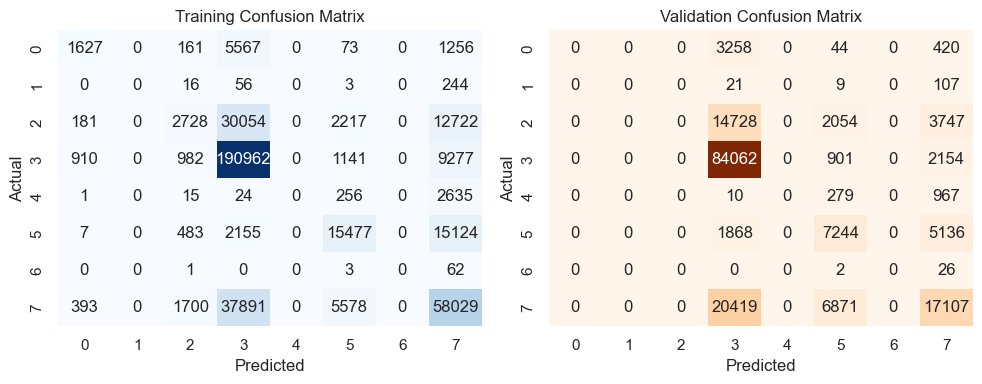

In [ ]:
# Pruned Decision Tree Classifier
pruned_dt = DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_split=50, min_samples_leaf=20)

# Fit pruned Decision Tree model with final features and calculate metrics for training and validation
pruned_dt.fit(final_features_X_train, y_train)
pred_train_dt_final = pruned_dt.predict(final_features_X_train)
pred_val_dt_final = pruned_dt.predict(final_features_X_val)
metrics(y_train, pred_train_dt_final, y_val, pred_val_dt_final)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.51      0.03      0.05      8684
           1       0.00      0.00      0.00       319
           2       0.51      0.06      0.11     47902
           3       0.78      0.97      0.86    203272
           4       0.00      0.00      0.00      2931
           5       0.63      0.51      0.56     33246
           6       0.00      0.00      0.00        66
           7       0.67      0.73      0.70    103591

    accuracy                           0.73    400011
   macro avg       0.39      0.29      0.29    400011
weighted avg       0.69      0.73      0.68    400011

[[   243      0    100   

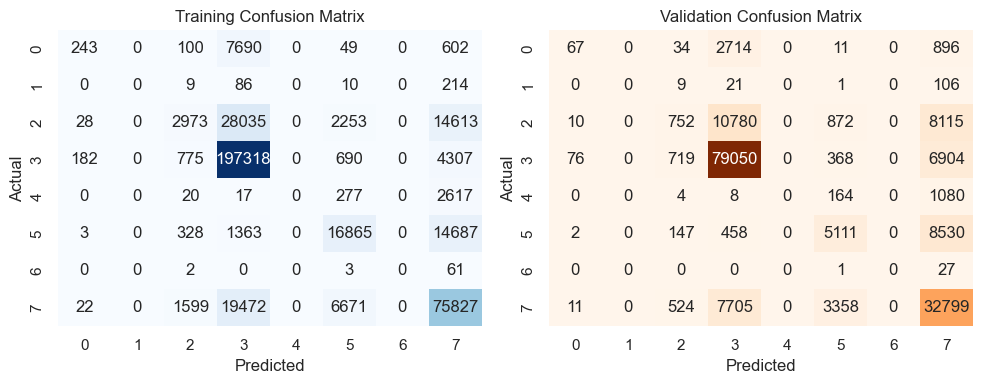

In [ ]:
# Fit pruned Decision Tree model with potential value features and calculate metrics for training and validation
pruned_dt.fit(potential_value_X_train, y_train)
pred_train_dt_potential = pruned_dt.predict(potential_value_X_train)
pred_val_dt_potential = pruned_dt.predict(potential_value_X_val)
metrics(y_train, pred_train_dt_potential, y_val, pred_val_dt_potential)

> ### Random forest

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.62      0.15      0.24      8684
           1       0.00      0.00      0.00       319
           2       0.52      0.04      0.07     47902
           3       0.71      0.95      0.81    203272
           4       0.00      0.00      0.00      2931
           5       0.67      0.43      0.52     33246
           6       0.00      0.00      0.00        66
           7       0.58      0.58      0.58    103591

    accuracy                           0.67    400011
   macro avg       0.39      0.27      0.28    400011
weighted avg       0.64      0.67      0.62    400011

[[  1316      0     81   

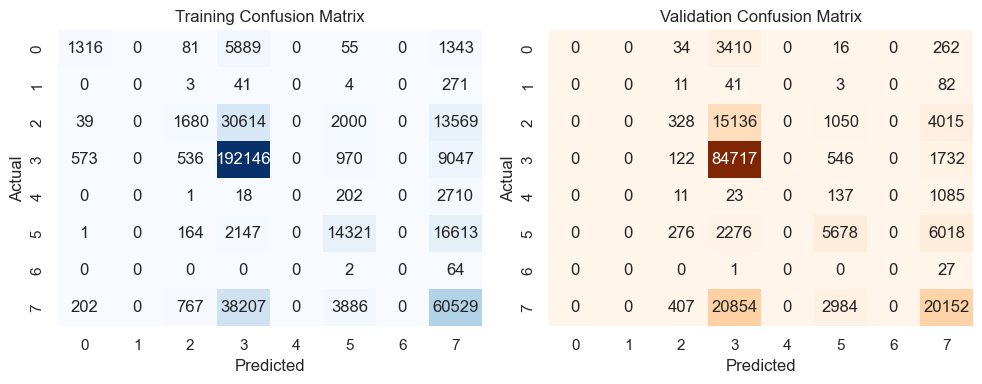

In [ ]:
# Fit Random Forest model with final features and potential value features
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Fit Random Forest model with final features and calculate metrics for training and validation
rf.fit(final_features_X_train, y_train)
pred_train_rf_final = rf.predict(final_features_X_train)
pred_val_rf_final = rf.predict(final_features_X_val)
metrics(y_train, pred_train_rf_final, y_val, pred_val_rf_final)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.00      0.01      8684
           1       0.00      0.00      0.00       319
           2       0.76      0.01      0.03     47902
           3       0.76      0.97      0.85    203272
           4       0.00      0.00      0.00      2931
           5       0.71      0.40      0.51     33246
           6       0.00      0.00      0.00        66
           7       0.64      0.74      0.69    103591

    accuracy                           0.72    400011
   macro avg       0.46      0.27      0.26    400011
weighted avg       0.72      0.72      0.66    400011

[[    40      0      9   

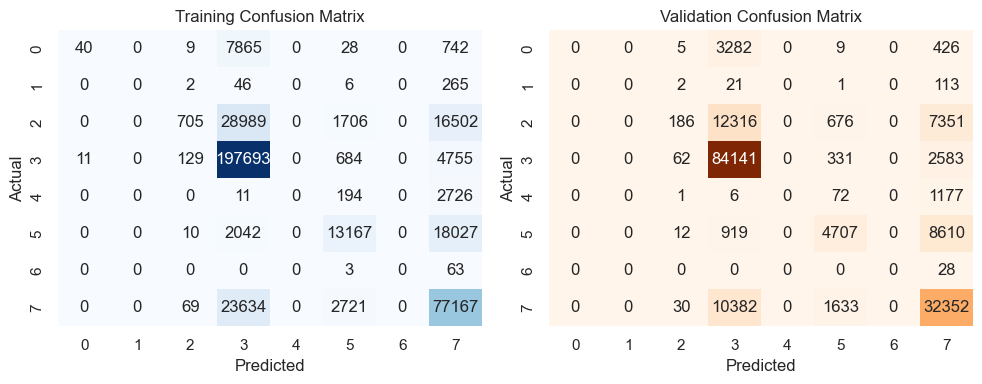

In [ ]:
# Fit Random Forest model with potential value features and calculate metrics for training and validation
rf.fit(potential_value_X_train, y_train)
pred_train_rf_potential = rf.predict(potential_value_X_train)
pred_val_rf_potential = rf.predict(potential_value_X_val)
metrics(y_train, pred_train_rf_potential, y_val, pred_val_rf_potential)

> ### Decision Tree with CV

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Pruned Decision Tree Classifier
pruned_dt = DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_split=50, min_samples_leaf=20)

# Perform 5-fold cross-validation on the training set for Decision Tree
dt_scores = cross_val_score(pruned_dt, final_features_X_train, y_train, cv=5)
print(f"Decision Tree Cross-Validation Accuracy: {dt_scores.mean()}")

Decision Tree Cross-Validation Accuracy: 0.6676916363655163


In [ ]:
# Pruned Decision Tree Classifier
pruned_dt = DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_split=50, min_samples_leaf=20)

# Perform 5-fold cross-validation on the training set for Decision Tree
dt_scores = cross_val_score(pruned_dt, potential_value_X_train, y_train, cv=5)
print(f"Decision Tree Cross-Validation Accuracy: {dt_scores.mean()}")

Decision Tree Cross-Validation Accuracy: 0.7285999641004313


> ### Neural network

In [ ]:
!pip install keras



[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
!pip install tensorflow --upgrade

     ---------------------------------------- 0.0/59.7 kB ? eta -:--:--
     ---------------------------------------- 59.7/59.7 kB 3.1 MB/s eta 0:00:00
     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     --------------------------------- ------ 41.0/48.7 kB ? eta -:--:--
     -------------------------------------- 48.7/48.7 kB 818.8 kB/s eta 0:00:00
   ---------------------------------------- 0.0/390.2 MB ? eta -:--:--
   ---------------------------------------- 0.1/390.2 MB 2.6 MB/s eta 0:02:28
   ---------------------------------------- 0.2/390.2 MB 3.1 MB/s eta 0:02:05
   ---------------------------------------- 0.3/390.2 MB 2.9 MB/s eta 0:02:14
   ---------------------------------------- 0.4/390.2 MB 2.8 MB/s eta 0:02:22
   ---------------------------------------- 0.6/390.2 MB 3.0 MB/s eta 0:02:11
   ---------------------------------------- 0.7/390.2 MB 2.9 MB/s eta 0:02:14
   ---------------------------------------- 0.8/390.2 MB 2.8 MB/s eta 0:02:18
   ---

ERROR: THESE PACKAGES DO NOT MATCH THE HASHES FROM THE REQUIREMENTS FILE. If you have updated the package versions, please update the hashes. Otherwise, examine the package contents carefully; someone may have tampered with them.
    unknown package:
        Expected sha256 af380d326e146f2d184a940ccf8350e9b6dc06a0530bfaa3a557b73819c4017b
             Got        0e6b569d88e4f16d7205c29429c733310f10e7e74cfb0a3017893135501ccece


[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:

unique_classes = np.unique(y_train)
print(f"Unique Classes in y_train: {unique_classes}")


Unique Classes in y_train: [0 1 2 3 4 5 6 7]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


# Define a neural network model for multi-class classification
model = Sequential()
model.add(Dense(32, input_dim=final_features_X_train.shape[1], activation='relu'))  # First hidden layer with 32 neurons
model.add(Dense(16, activation='relu'))  # Second hidden layer with 16 neurons
model.add(Dense(16, activation='relu'))  # third hidden layer with 16 neurons
model.add(Dense(8, activation='softmax'))  # Output layer with 5 units for 5 classes

# Compile the model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model on the training data
model.fit(final_features_X_train, y_train, epochs=20, batch_size=32, validation_data=(final_features_X_val, y_val), verbose=1, callbacks=[early_stopping])

# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(final_features_X_val, y_val, verbose=1)
print(f"Validation Accuracy: {val_accuracy}")

Epoch 1/20
12501/12501 [==============================] - 44s 3ms/step - loss: 1.1388 - accuracy: 0.6026 - val_loss: 1.1090 - val_accuracy: 0.6274
Epoch 2/20
12501/12501 [==============================] - 43s 3ms/step - loss: 1.0051 - accuracy: 0.6352 - val_loss: 1.1148 - val_accuracy: 0.6222
Epoch 3/20
12501/12501 [==============================] - 46s 4ms/step - loss: 0.9908 - accuracy: 0.6402 - val_loss: 1.0336 - val_accuracy: 0.6241
Epoch 4/20
12501/12501 [==============================] - 28s 2ms/step - loss: 0.9818 - accuracy: 0.6444 - val_loss: 1.0540 - val_accuracy: 0.6220
Epoch 5/20
12501/12501 [==============================] - 23s 2ms/step - loss: 0.9755 - accuracy: 0.6466 - val_loss: 1.0641 - val_accuracy: 0.6219
Epoch 6/20
12501/12501 [==============================] - 24s 2ms/step - loss: 0.9708 - accuracy: 0.6480 - val_loss: 1.1125 - val_accuracy: 0.6274
Epoch 7/20
12501/12501 [==============================] - 24s 2ms/step - loss: 0.9675 - accuracy: 0.6489 - val_loss: 1